# **Подпись и выполненные задачи**
- Выполнил: Кондрашов Даниил (Искусственный интеллект и наука о данных магистратура 1 курс, группа 25.М81-мм);

**Задачи**:
- [X] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [X] Считать данные и вывести их основные характеристики, описание признаков.
- [X] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [X] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [X] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [X] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [X] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

# **Импорт библиотек**

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# **Загрузка датасета**

Рассмотрим датасет банковских кредитов, который можно скачать [тут](https://www.kaggle.com/datasets/kapturovalexander/bank-credit-risk-assessment)

In [320]:
data = pd.read_csv('bank_credit_scoring.csv', index_col='CLIENTID')

# **Краткое описание датасета и формулирование задачи предсказания**

Датасет представляет собой банковские данные о выдаче кредитов.

**Features:**
- **Задолженность** - общая сумма непогашенной задолженности;
- **Просрочка, дни** - количество дней просрочки платежа;
- **Первоначальный лимит** - первоначальный кредитный лимит, назначенный клиенту;
- **BIRTHDATE** - дата рождения клиента в формате YYYY-MM-DD;
- **SEX** - пол клиента;
- **EDU** - уровень образования клиента (например, специальное, высшее и так далее);
- **INCOME** - ежемесячный или годовой доход клиента;
- **TERM** - срок действия займа или кредитного соглашения;
- **Рейтинг кредитной истории** - оценка или рейтинг, отражающий кредитную историю клтиента;
- **LV_AREA** - географический район или регион, в котором проживает клиент;
- **LV_SETTLEMENTNAME** - название города, посёлка или населенного пункта, в котором проживает клиент;
- **INDUSTRYNAME** - отрасль или сектор, в котором работает клиент;
- **PDN** (целевой признак) - предполагаемая вероятность того, что клиент не выполнит обязательства по кредиту;
- **CLIENTID** - уникальный идентификатор, присвоенный клиенту;
- **SCORINGMARK** - кредитный рейтинг или оценка риска, присвоенные клиенту;
- **UNDERAGECHILDRENCOUNT** - количество несовершеннолетних детей, имеющихся у клиента;
- **VELCOMSCORING** - конкретный балльный показатель (возможно, связанный с телекоммуникациями), используемый при оценке рисков;
- **FAMILYSTATUS** - семейное положение клиента (например, холост, женат, разведен).


В данном случае нужно решить задачу предсказания вероятности (задача регрессии) невозврата кредита клиентом (переменная PDN).

# **EDA**

Для начала узнаем размеры датасета и типы столбцов.

In [321]:
data.shape

(18420, 17)

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18420 entries, 919517 to 1061453
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Задолженность              18420 non-null  float64
 1   Просрочка, дни             18420 non-null  int64  
 2   Первоначльный лимит        18420 non-null  float64
 3   BIRTHDATE                  18420 non-null  object 
 4   SEX                        18420 non-null  object 
 5   EDU                        18420 non-null  object 
 6   INCOME                     18420 non-null  float64
 7   TERM                       18420 non-null  int64  
 8   Рейтинг кредитной истории  17488 non-null  object 
 9   LV_AREA                    16297 non-null  object 
 10  LV_SETTLEMENTNAME          18374 non-null  object 
 11  INDUSTRYNAME               18420 non-null  object 
 12  PDN                        18420 non-null  float64
 13  SCORINGMARK                16786 non-null  f

Посмотрим есть ли в данных пропуски и сколько их.

In [323]:
data.isna().sum()

,0
Задолженность,0
"Просрочка, дни",0
Первоначльный лимит,0
BIRTHDATE,0
SEX,0
EDU,0
INCOME,0
TERM,0
Рейтинг кредитной истории,932
LV_AREA,2123


В некоторых столбцах есть много пропусков, будем учитывать это в дальнейшем.

Сразу посмотрим на целевую переменную **PDN**, есть ли в ней перекосы или дисбалансы.

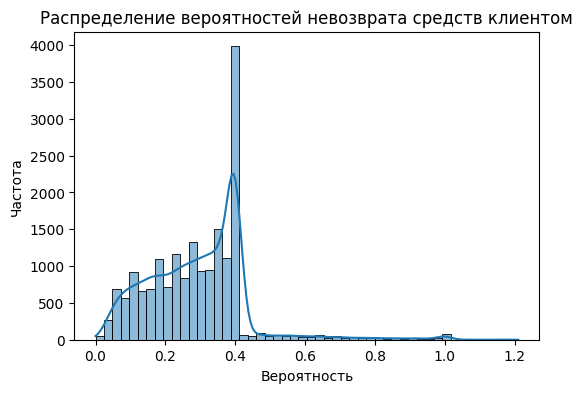

In [324]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='PDN', kde=True, bins=50)
plt.title('Распределение вероятностей невозврата средств клиентом')
plt.xlabel('Вероятность')
plt.ylabel('Частота')
plt.show()

In [325]:
f'{data.loc[data['PDN'] > 0.4].shape[0] / data.shape[0] * 100:.2f}%'

'5.41%'

Видно, что есть большой дисбаланс: людей, которые потенциально не вернут кредит значительно меньше, чем тех, кто потенциально его вернёт.

Это может отразиться в дальнейшем при обучении, поэтому, возможно, "классы" нужно будет балансировать.

## **Первичный анализ признаков**

Перед началом анализа для удобства переименуем столбцы.

In [326]:
data.rename(columns={
    'Задолженность': 'Debt',
    'Просрочка, дни': 'Overdue_days',
    'Первоначльный лимит': 'Initial_limit',
    'BIRTHDATE': 'Birthdate',
    'SEX': 'Sex',
    'INCOME': 'Income',
    'TERM': 'Term',
    'Рейтинг кредитной истории': 'Credit_history_rating',
    'LV_AREA': 'Area',
    'LV_SETTLEMENTNAME': 'Settlement',
    'INDUSTRYNAME': 'Industry',
    'SCORINGMARK': 'Scoringmark',
    'UNDERAGECHILDRENCOUNT': 'Children',
    'VELCOMSCORING': 'Velcom_scoring',
    'FAMILYSTATUS': 'Family_status'
}, inplace=True)

### **Количественный признак Debt**

In [327]:
data['Debt'].describe()

,Debt
count,18420.000000
mean,4318.769750
std,4336.432353
min,0.000000
25%,1287.900000
50%,2675.670000
75%,5785.870000
max,40000.000000


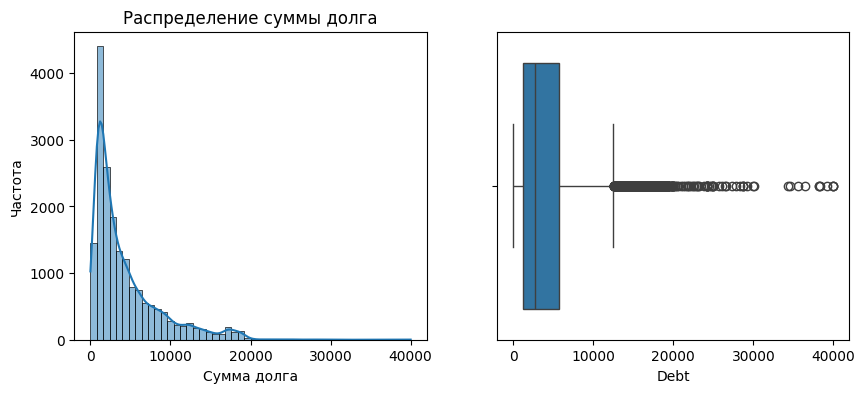

In [328]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Debt', kde=True, bins=50)
plt.title('Распределение суммы долга')
plt.xlabel('Сумма долга')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Debt')

plt.show()

Есть наличие сильно выделяющихся значений, похожих на выбросы. Однако перед тем как сделать вывод об их удалении нужно посмотреть ещё на их количество и корреляцию с целевым признаком.

num = 54 percent = 0.29%


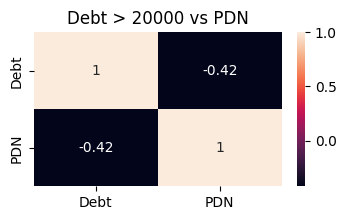

In [329]:
print(f'num = {data[data['Debt'] > 20000].shape[0]} percent = {data[data['Debt'] > 20000].shape[0] / data.shape[0] * 100:.2f}%')
plt.figure(figsize=(4, 2))
sns.heatmap(data.loc[data['Debt'] > 20000, ['Debt', 'PDN']].corr(), annot=True)
plt.title('Debt > 20000 vs PDN')
plt.show()

Видно, что корреляция есть, поэтому не станем удалять подобные объекты.

Теперь посмотрим на корреляцию с целевым признаком в целом.

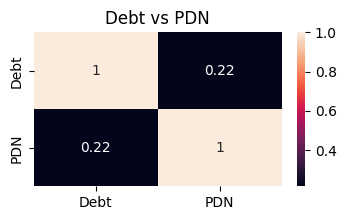

In [330]:
plt.figure(figsize=(4, 2))
sns.heatmap(data[['Debt', 'PDN']].corr(), annot=True)
plt.title('Debt vs PDN')
plt.show()

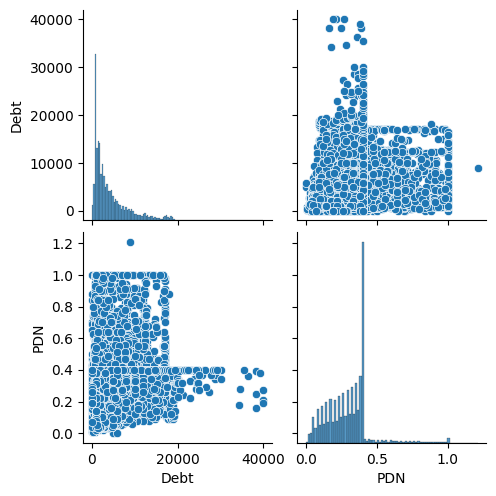

In [331]:
sns.pairplot(data[['Debt', 'PDN']])
plt.show()

Сильной линейной зависимости нет. Скорее всего, данный признак имеет не сильное влияние, однако, как было видно раньше, большие кредиты не выдают людям, которые не смогут вернуть их.

### **Количественный признак Overdue_days**

In [332]:
data['Overdue_days'].describe()

,Overdue_days
count,18420.000000
mean,9.196743
std,42.309092
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,491.000000


Данные достаточно странные, явно есть выбросы, попробуем посмотреть более подробно.

In [333]:
for i in [p ** 2 for p in range(0, 20+1)]:
    amount = data.loc[data['Overdue_days'] > i].shape[0]
    print(f'Просрочка > {i}: {amount}, {amount / data.shape[0] * 100:.2f}%')

Просрочка > 0: 2638, 14.32%
Просрочка > 1: 2638, 14.32%
Просрочка > 4: 1192, 6.47%
Просрочка > 9: 1192, 6.47%
Просрочка > 16: 1182, 6.42%
Просрочка > 25: 1182, 6.42%
Просрочка > 36: 947, 5.14%
Просрочка > 49: 945, 5.13%
Просрочка > 64: 755, 4.10%
Просрочка > 81: 755, 4.10%
Просрочка > 100: 620, 3.37%
Просрочка > 121: 619, 3.36%
Просрочка > 144: 484, 2.63%
Просрочка > 169: 383, 2.08%
Просрочка > 196: 306, 1.66%
Просрочка > 225: 232, 1.26%
Просрочка > 256: 162, 0.88%
Просрочка > 289: 110, 0.60%
Просрочка > 324: 60, 0.33%
Просрочка > 361: 38, 0.21%
Просрочка > 400: 15, 0.08%


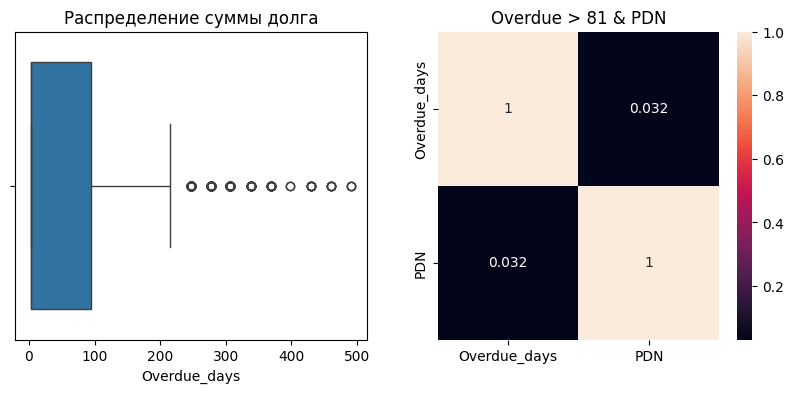

In [334]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=data.loc[data['Overdue_days'] > 0], x='Overdue_days')
plt.title('Распределение суммы долга')

plt.subplot(1, 2, 2)
sns.heatmap(data=data.loc[data['Overdue_days'] > 81, ['Overdue_days', 'PDN']].corr(), annot=True)
plt.title('Overdue > 81 & PDN')

plt.show()

Теперь можно сказать, что линейной зависимости между большим количеством дней просрочки и вероятностью дефолта нет. Кроме того, можно сказать, что людей, у которых есть очень большие просрочки, очень немного, следовательно, это выбросы и их стоит удалить.

In [335]:
data = data[data['Overdue_days'] < 200]

Теперь посмотрим на корреляцию с целевым признаком в целом.

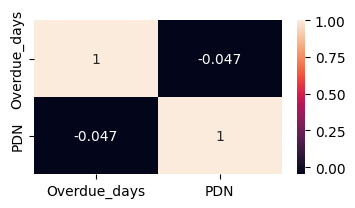

In [336]:
plt.figure(figsize=(4, 2))
sns.heatmap(data[['Overdue_days', 'PDN']].corr(), annot=True)
plt.show()

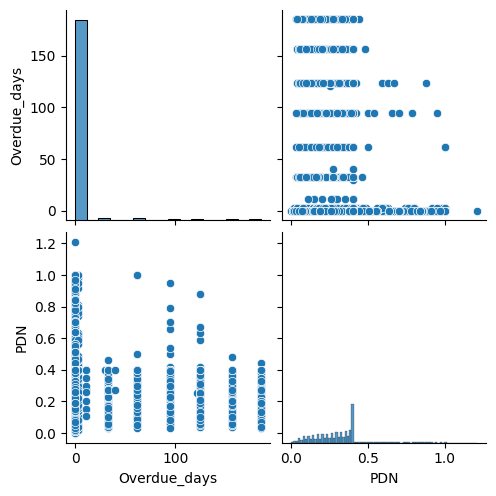

In [337]:
sns.pairplot(data[['Overdue_days', 'PDN']])
plt.show()

Видно, что нет прямой зависимости между количеством дней просрочки и вероятностью дефолта. Скорее всего, данный признак не очень важный.

### **Количественный признак Initial_limit**

In [338]:
data['Initial_limit'].describe()

,Initial_limit
count,18114.000000
mean,5139.257039
std,4895.355987
min,180.000000
25%,1550.000000
50%,3200.000000
75%,7000.000000
max,40000.000000


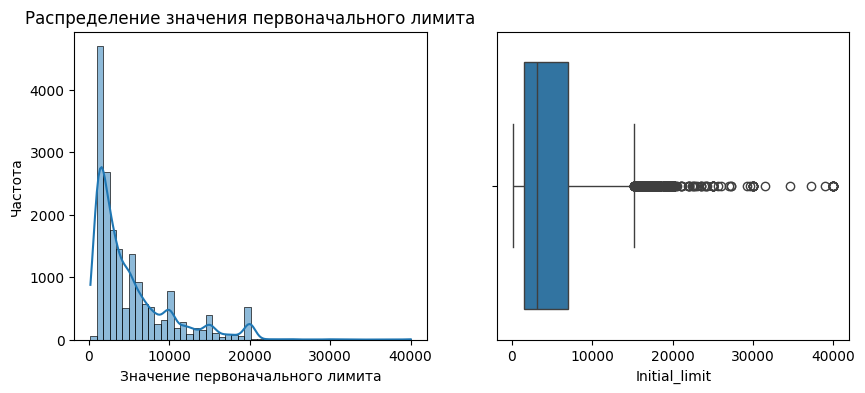

In [339]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Initial_limit', kde=True, bins=50)
plt.title('Распределение значения первоначального лимита')
plt.xlabel('Значение первоначального лимита')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Initial_limit')

plt.show()

Тут ситуация такая же, как и с признаком Debt, поэтому поступим точно также.

Num = 65 percent = 0.36%


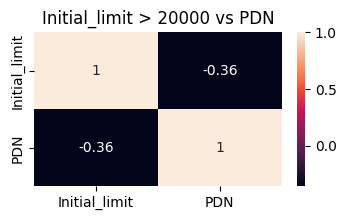

In [340]:
print(f'Num = {data[data['Initial_limit'] > 20000].shape[0]} percent = {data[data['Initial_limit'] > 20000].shape[0] / data.shape[0] * 100:.2f}%')

plt.figure(figsize=(4, 2))
sns.heatmap(data.loc[data['Initial_limit'] > 20000, ['Initial_limit', 'PDN']].corr(), annot=True)
plt.title('Initial_limit > 20000 vs PDN')

plt.show()

Аналогично Debt корреляция прослеживается, поэтому большие значения оставим.

Теперь посмотрим на корреляцию в целом.

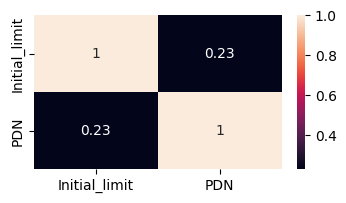

In [341]:
plt.figure(figsize=(4, 2))
sns.heatmap(data[['Initial_limit', 'PDN']].corr(), annot=True)
plt.show()

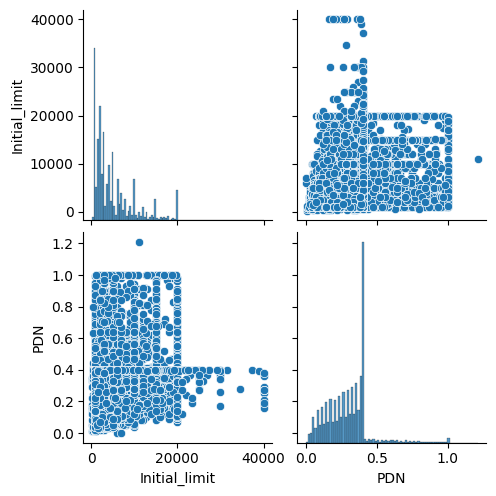

In [342]:
sns.pairplot(data[['Initial_limit', 'PDN']])
plt.show()

Некоторая зависимость есть, но слабо выраженная.

Пожалуй можно сказать только одно, если заёмщику одобрят большой кредит, то он скорее всего он его вернёт.

### **Признак Birhtdate**

С данным признаком в изначальном его виде будет очень трудно работать. Поэтому вычислим на его основе новый признак Age и удалим старый.

In [343]:
data['Age'] = (pd.to_datetime('today') - pd.to_datetime(data['Birthdate'], format='%Y-%m-%d')).dt.days // 365
data.drop(columns='Birthdate', inplace=True)

In [344]:
data['Age'].describe()

,Age
count,18114.000000
mean,37.422436
std,10.231208
min,20.000000
25%,29.000000
50%,36.000000
75%,44.000000
max,69.000000


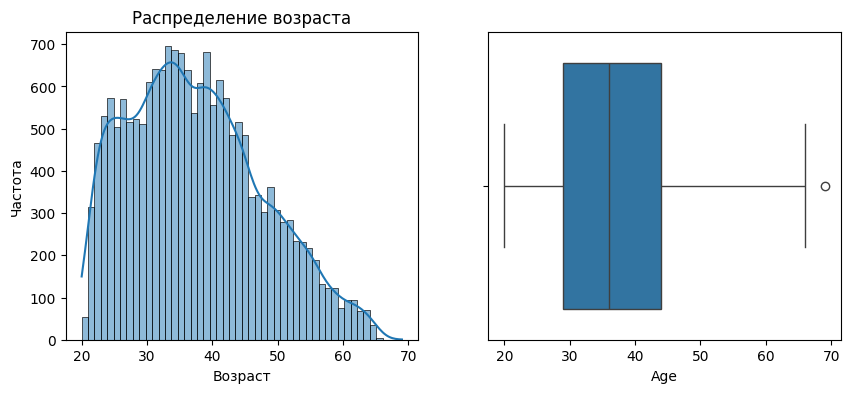

In [345]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Age', kde=True, bins=50)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Age')

plt.show()

Можно сказать, что выбросов нет.

Теперь посмотрим на корреляцию с целевым признаком.

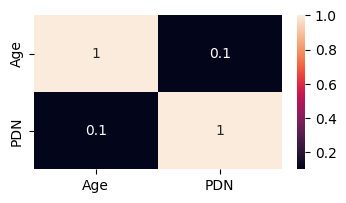

In [346]:
plt.figure(figsize=(4, 2))
sns.heatmap(data[['Age', 'PDN']].corr(), annot=True)
plt.show()

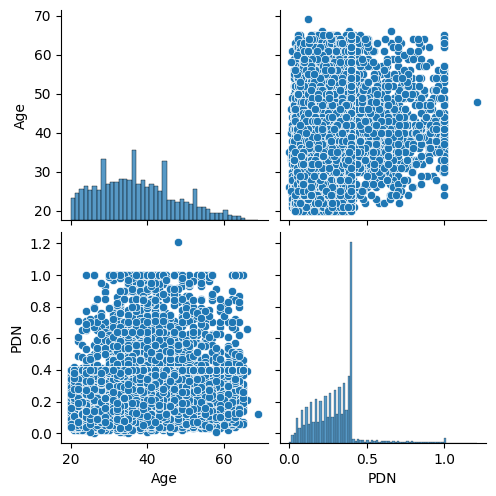

In [347]:
sns.pairplot(data[['Age', 'PDN']])
plt.show()

Пожалуй по графикам и матрице корреляции можно сказать, что никакой линейной зависимости между этими двумя признаками нет.

### **Категориальный признак Sex**

In [348]:
data['Sex'].value_counts()

,count
Sex,
Мужской,11074
Женский,7040


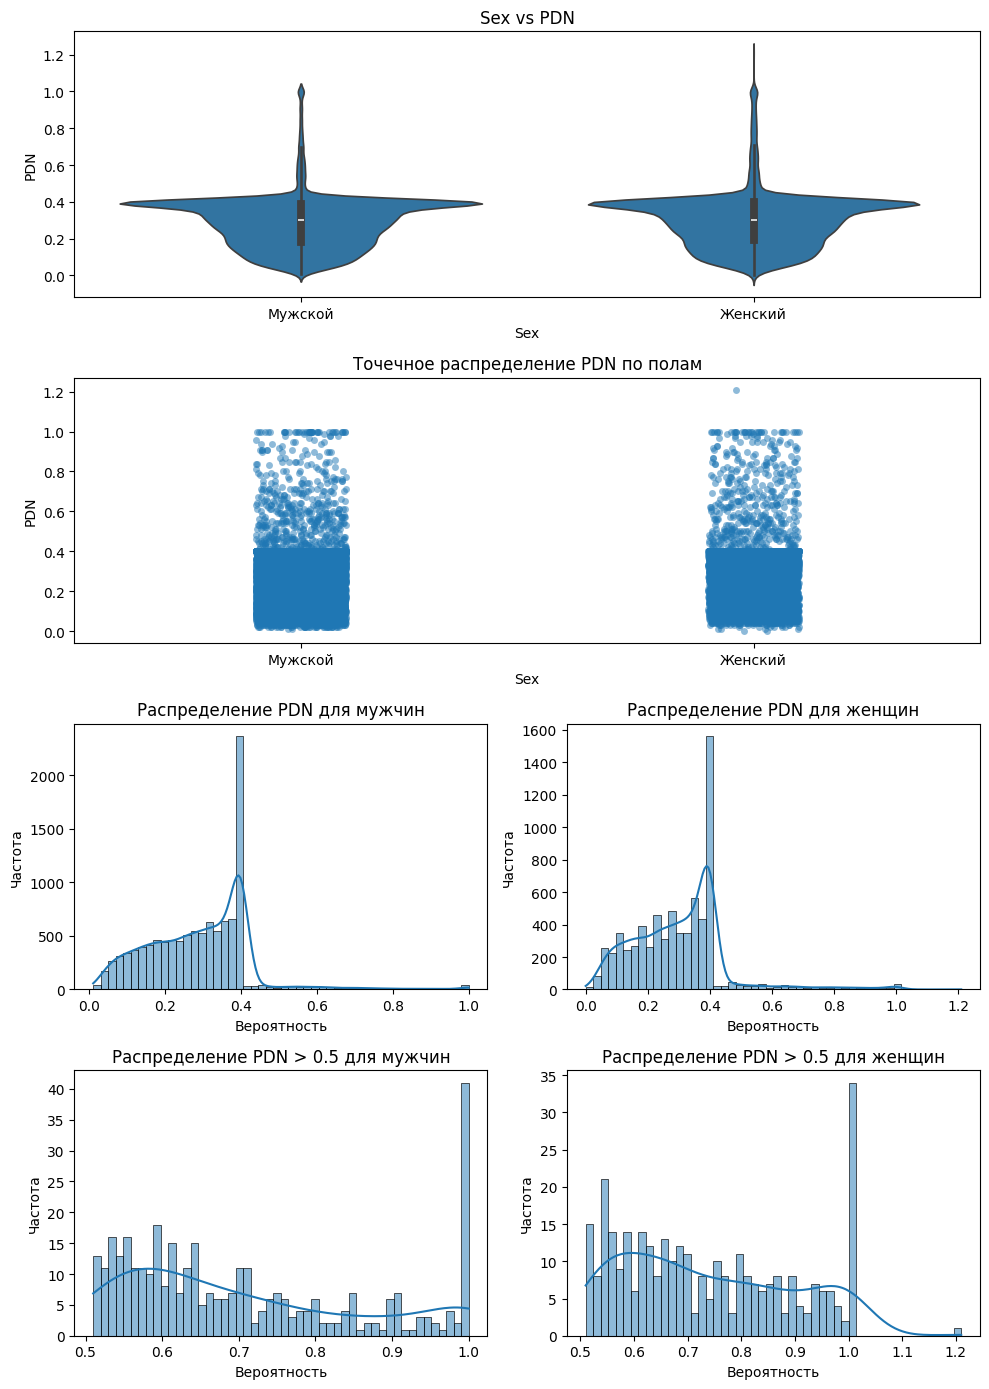

Мужчин с PDN > 0.5 = 364 (3.29%) процент от всех с PDN > 0.5 = 52.53%; Женщин с PDN > 0.5 = 329 (4.67%) процент от всех с PDN > 0.5 = 47.47%
Мужчин с PDN > 0.6 = 237 (2.14%) процент от всех с PDN > 0.6 = 49.48%; Женщин с PDN > 0.6 = 242 (3.44%) процент от всех с PDN > 0.6 = 50.52%
Мужчин с PDN > 0.7 = 147 (1.33%) процент от всех с PDN > 0.7 = 47.57%; Женщин с PDN > 0.7 = 162 (2.30%) процент от всех с PDN > 0.7 = 52.43%
Мужчин с PDN > 0.8 = 94 (0.85%) процент от всех с PDN > 0.8 = 45.19%; Женщин с PDN > 0.8 = 114 (1.62%) процент от всех с PDN > 0.8 = 54.81%


In [349]:
plt.figure(figsize=(10, 14))

plt.subplot(4, 1, 1)
sns.violinplot(data=data, x='Sex', y='PDN')
plt.title('Sex vs PDN')

plt.subplot(4, 1, 2)
sns.stripplot(data=data, x='Sex', y='PDN', alpha=0.5, jitter=True)
plt.title('Точечное распределение PDN по полам')

plt.subplot(4, 2, 5)
sns.histplot(data=data[data['Sex'] == 'Мужской'], x='PDN', kde=True, bins=50)
plt.title('Распределение PDN для мужчин')
plt.xlabel('Вероятность')
plt.ylabel('Частота')

plt.subplot(4, 2, 6)
sns.histplot(data=data[data['Sex'] == 'Женский'], x='PDN', kde=True, bins=50)
plt.title('Распределение PDN для женщин')
plt.xlabel('Вероятность')
plt.ylabel('Частота')

plt.subplot(4, 2, 7)
sns.histplot(data=data.query("Sex == 'Мужской' and PDN > 0.5"), x='PDN', kde=True, bins=50)
plt.title('Распределение PDN > 0.5 для мужчин')
plt.xlabel('Вероятность')
plt.ylabel('Частота')

plt.subplot(4, 2, 8)
sns.histplot(data=data.query("Sex == 'Женский' and PDN > 0.5"), x='PDN', kde=True, bins=50)
plt.title('Распределение PDN > 0.5 для женщин')
plt.xlabel('Вероятность')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

num_human_over_05 = data.query('PDN > 0.5').shape[0]
num_human_over_06 = data.query('PDN > 0.6').shape[0]
num_human_over_07 = data.query('PDN > 0.7').shape[0]
num_human_over_08 = data.query('PDN > 0.8').shape[0]

num_man = data[data['Sex'] == 'Мужской'].shape[0]
num_man_over_05 = data.query("Sex == 'Мужской' and PDN > 0.5").shape[0]
num_man_over_06 = data.query("Sex == 'Мужской' and PDN > 0.6").shape[0]
num_man_over_07 = data.query("Sex == 'Мужской' and PDN > 0.7").shape[0]
num_man_over_08 = data.query("Sex == 'Мужской' and PDN > 0.8").shape[0]

num_woman = data[data['Sex'] == 'Женский'].shape[0]
num_woman_over_05 = data.query("Sex == 'Женский' and PDN > 0.5").shape[0]
num_woman_over_06 = data.query("Sex == 'Женский' and PDN > 0.6").shape[0]
num_woman_over_07 = data.query("Sex == 'Женский' and PDN > 0.7").shape[0]
num_woman_over_08 = data.query("Sex == 'Женский' and PDN > 0.8").shape[0]

print(f'Мужчин с PDN > 0.5 = {num_man_over_05} ({num_man_over_05 / num_man * 100:.2f}%) процент от всех с PDN > 0.5 = {num_man_over_05 / num_human_over_05 * 100:.2f}%; Женщин с PDN > 0.5 = {num_woman_over_05} ({num_woman_over_05 / num_woman * 100:.2f}%) процент от всех с PDN > 0.5 = {num_woman_over_05 / num_human_over_05 * 100:.2f}%')
print(f'Мужчин с PDN > 0.6 = {num_man_over_06} ({num_man_over_06 / num_man * 100:.2f}%) процент от всех с PDN > 0.6 = {num_man_over_06 / num_human_over_06 * 100:.2f}%; Женщин с PDN > 0.6 = {num_woman_over_06} ({num_woman_over_06 / num_woman * 100:.2f}%) процент от всех с PDN > 0.6 = {num_woman_over_06 / num_human_over_06 * 100:.2f}%')
print(f'Мужчин с PDN > 0.7 = {num_man_over_07} ({num_man_over_07 / num_man * 100:.2f}%) процент от всех с PDN > 0.7 = {num_man_over_07 / num_human_over_07 * 100:.2f}%; Женщин с PDN > 0.7 = {num_woman_over_07} ({num_woman_over_07 / num_woman * 100:.2f}%) процент от всех с PDN > 0.7 = {num_woman_over_07 / num_human_over_07 * 100:.2f}%')
print(f'Мужчин с PDN > 0.8 = {num_man_over_08} ({num_man_over_08 / num_man * 100:.2f}%) процент от всех с PDN > 0.8 = {num_man_over_08 / num_human_over_08 * 100:.2f}%; Женщин с PDN > 0.8 = {num_woman_over_08} ({num_woman_over_08 / num_woman * 100:.2f}%) процент от всех с PDN > 0.8 = {num_woman_over_08 / num_human_over_08 * 100:.2f}%')

Можно сказать, что нет большой зависимости между полом заёмщика и вероятностью невозврата им средств. У женщин, конечно, людей с вероятностью невозврата > 0.5 больше, но не значительно.

Таким образом, какой-то сильной корреляции тут нет.

### **Категориальный признак EDU**

In [350]:
data['EDU'].value_counts()

,count
EDU,
Среднее специальное,9015
Высшее,6090
Среднее,2453
Неоконченное высшее,546
**Послевузовское,10


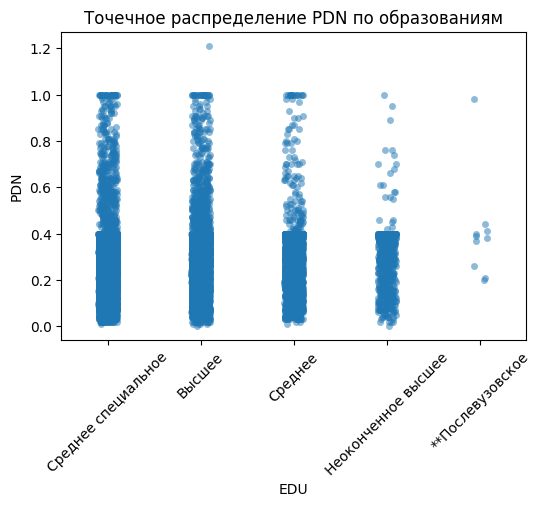

In [351]:
plt.figure(figsize=(6, 4))
sns.stripplot(data=data, x='EDU', y='PDN', alpha=0.5, jitter=True)
plt.title('Точечное распределение PDN по образованиям')
plt.xticks(rotation=45)
plt.show()

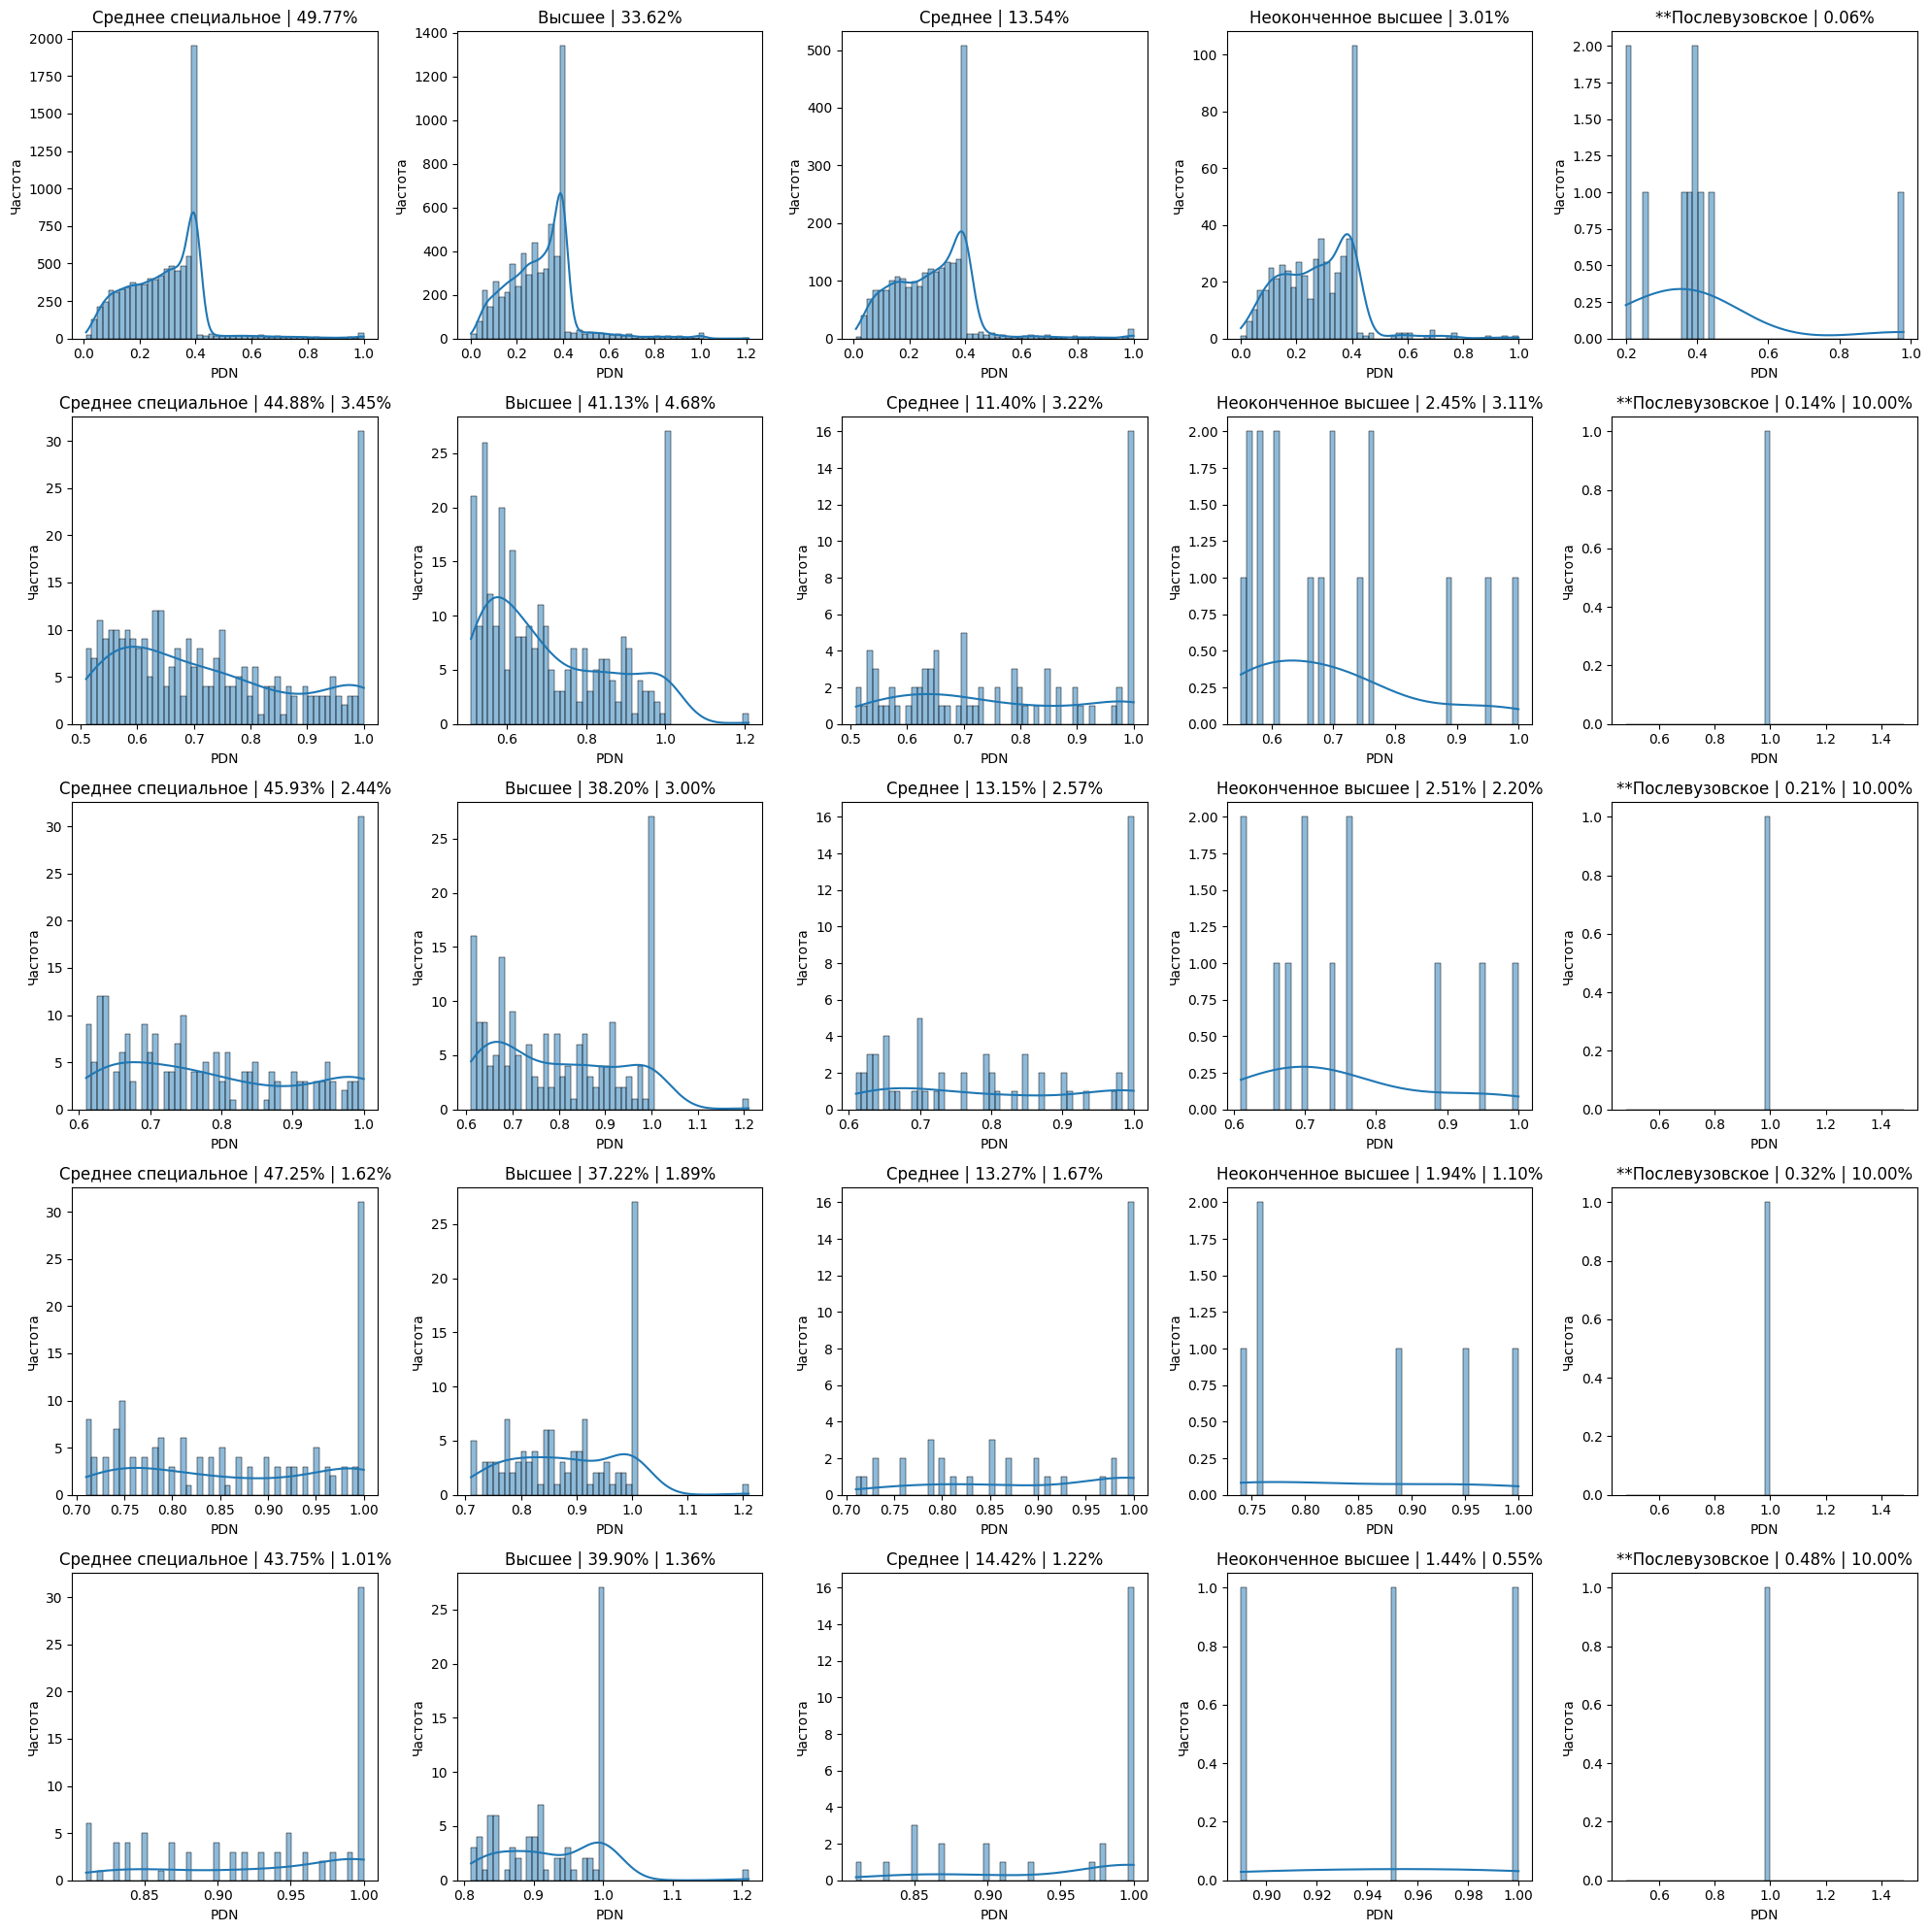

In [352]:
plt.figure(figsize=(20, 20))
for i, p in enumerate([0, 0.5, 0.6, 0.7, 0.8]):
    for j in range(1, 5+1):
        plt.subplot(5, 5, i*5+j)
        if i == 0:
            num_pdn = data.query(f"PDN > {p}").shape[0]
            num_pdn_edu = data.query(f"EDU == '{data['EDU'].unique()[j - 1]}'").shape[0]
            percent = data.query(f"EDU == '{data['EDU'].unique()[j - 1]}'").shape[0] / num_pdn * 100

            sns.histplot(data=data.query(f"EDU == '{data['EDU'].unique()[j - 1]}'"), x='PDN', kde=True, bins=50)
            plt.title(f'{data['EDU'].unique()[j - 1]} | {percent:.2f}%')
        else:
            num_pdn = data.query(f"PDN > {p}").shape[0]
            num_pdn_edu = data.query(f"EDU == '{data['EDU'].unique()[j - 1]}'").shape[0]
            percent = data.query(f"PDN > {p} and EDU == '{data['EDU'].unique()[j - 1]}'").shape[0] / num_pdn * 100
            percent_edu = data.query(f"PDN > {p} and EDU == '{data['EDU'].unique()[j - 1]}'").shape[0] / num_pdn_edu * 100

            sns.histplot(data=data.query(f"PDN > {p} and EDU == '{data['EDU'].unique()[j - 1]}'"), x='PDN', kde=True, bins=50)
            plt.title(f'{data['EDU'].unique()[j - 1]} | {percent:.2f}% | {percent_edu:.2f}%')
        plt.xlabel('PDN')
        plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Пояснение по заголовкам:

Наименование уровня образования | процентное соотношение категории с условиями, к размерности датасета | процентное соотношения категории с улосвиями к категории без условий

На первый взгляд можно сказать, что люди со средним специальным и высшим образованием имеют большую вероятность не вернуть кредит. Однако при более тщательном рассмотрении видно, что данный поверхностный вывод получается из-за несбалансированности по образованию. А как раз процентное соотношение, например, людей с высшим образованием и высокой вероятностью дефолта к просто людям с высшим образованием не сильно отличается от такого же процентного соотношения но для среднего образования или других. Таким образом, можно сказать, что вряд ли этот признак поможет при обучении модели.

Вообще стоит сказать, что в данных очень сильный дисбаланс, что очень сильно затрудняет анализ. Возможно, после балансировки ситуация поменяется.

### **Количественный признак Income**

In [353]:
data['Income'].describe()

,Income
count,18114.000000
mean,1673.438714
std,1053.261870
min,0.000000
25%,1030.480000
50%,1468.370000
75%,1991.137500
max,29942.820000


Разброс данных опять же очень большой, поэтому посмотрим на данные более подробно

In [354]:
for i in range(5000, 30000, 1000):
    income = data.loc[data['Income'] > i].shape[0]
    print(f'Ежемесячный доход > {i}: {income}, {income / data.shape[0] * 100:.2f}%')

Ежемесячный доход > 5000: 282, 1.56%
Ежемесячный доход > 6000: 157, 0.87%
Ежемесячный доход > 7000: 86, 0.47%
Ежемесячный доход > 8000: 37, 0.20%
Ежемесячный доход > 9000: 16, 0.09%
Ежемесячный доход > 10000: 8, 0.04%
Ежемесячный доход > 11000: 6, 0.03%
Ежемесячный доход > 12000: 6, 0.03%
Ежемесячный доход > 13000: 5, 0.03%
Ежемесячный доход > 14000: 5, 0.03%
Ежемесячный доход > 15000: 2, 0.01%
Ежемесячный доход > 16000: 2, 0.01%
Ежемесячный доход > 17000: 2, 0.01%
Ежемесячный доход > 18000: 2, 0.01%
Ежемесячный доход > 19000: 2, 0.01%
Ежемесячный доход > 20000: 2, 0.01%
Ежемесячный доход > 21000: 2, 0.01%
Ежемесячный доход > 22000: 2, 0.01%
Ежемесячный доход > 23000: 2, 0.01%
Ежемесячный доход > 24000: 2, 0.01%
Ежемесячный доход > 25000: 2, 0.01%
Ежемесячный доход > 26000: 2, 0.01%
Ежемесячный доход > 27000: 2, 0.01%
Ежемесячный доход > 28000: 2, 0.01%
Ежемесячный доход > 29000: 1, 0.01%


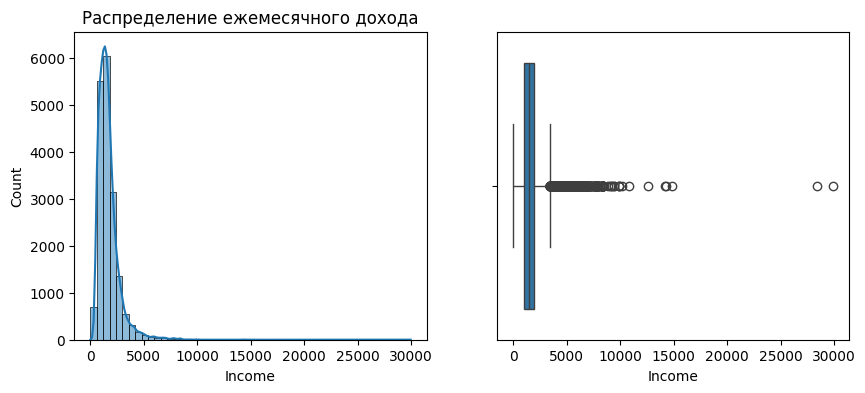

In [355]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Income', kde=True, bins=50)
plt.title('Распределение ежемесячного дохода')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Income')

plt.show()

Тут стоит вспомнить, что в данном столбце ещё располагаеются доходы не за месяц, а за год, поэтому и возникают подобные выбросы.

Однако перед тем как их удалить посмотрим, есть ли некоторая корреляция выбросов с вероятностью дефолта.

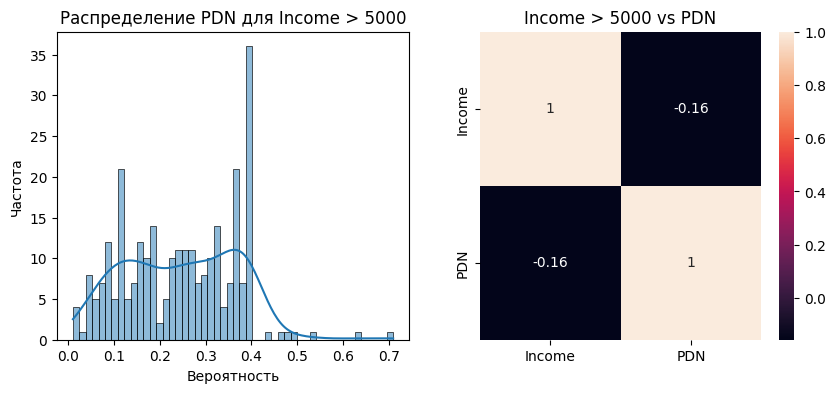

Количество людей с PDN > 0.5 при их ежемесячном доходе > 5000 = 1.06%


In [356]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data[data['Income'] > 5000], x='PDN', kde=True, bins=50)
plt.title('Распределение PDN для Income > 5000')
plt.xlabel('Вероятность')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.heatmap(data.loc[data['Income'] > 5000, ['Income', 'PDN']].corr(), annot=True)
plt.title('Income > 5000 vs PDN')

plt.show()

print(f'Количество людей с PDN > 0.5 при их ежемесячном доходе > 5000 = {data.query('Income > 5000 and PDN > 0.5').shape[0] / data.query('Income > 5000').shape[0] * 100:.2f}%')

Можно сказать, что да, чем больше человек зарабатывает, тем больше вероятность, что он вернёт кредит. Однако стоит сказать, что данных с доходом выше 5000 очень мало, ничтожно мало по отношению к остальной выборке, что может привести к плохим результатам обучения, поэтому я считаю, что вопрос об удалении подобных выбросов остаётся открытым.

Теперь посмотрим на корреляцию в целом.

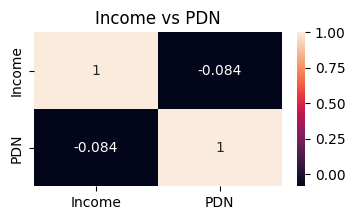

In [357]:
plt.figure(figsize=(4, 2))
sns.heatmap(data[['Income', 'PDN']].corr(), annot=True)
plt.title('Income vs PDN')
plt.show()

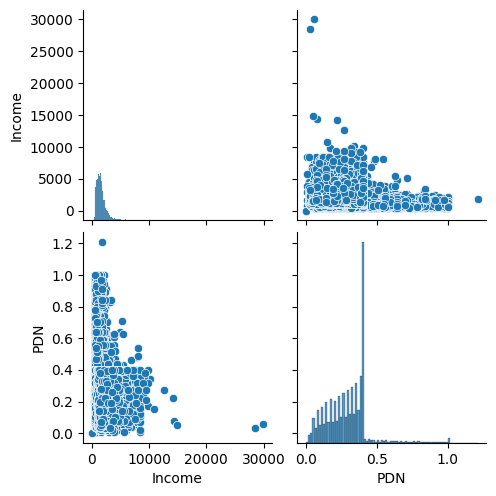

In [358]:
sns.pairplot(data[['Income', 'PDN']])
plt.show()

Несмотря на то, что матрица корреляций показывает значения близкие к нулю, явно прослеживается обратная зависимость.

Объяснить это можно следющими двумя способами:
- Человек с высоким уровнем дохода, скорее всего, имеет трудно заменимую должность, поэтому вряд ли его уволят;
- Человек с высоким уровнем дохода даже при каких-либо непредвиденных денежных тратах (необходимость потратить много денег в моменте по каким-либо несчастьям или тому подобное) сможет быстрее восстановить свой денежный баланс, нежели человек с низким доходом.

Таким образом, мне видится, что это достаточно важный признак.

### **Количественный признак Term (срок действия займа)**

In [359]:
data['Term'].describe()

,Term
count,18114.000000
mean,52.284973
std,13.395650
min,23.000000
25%,36.000000
50%,60.000000
75%,60.000000
max,60.000000


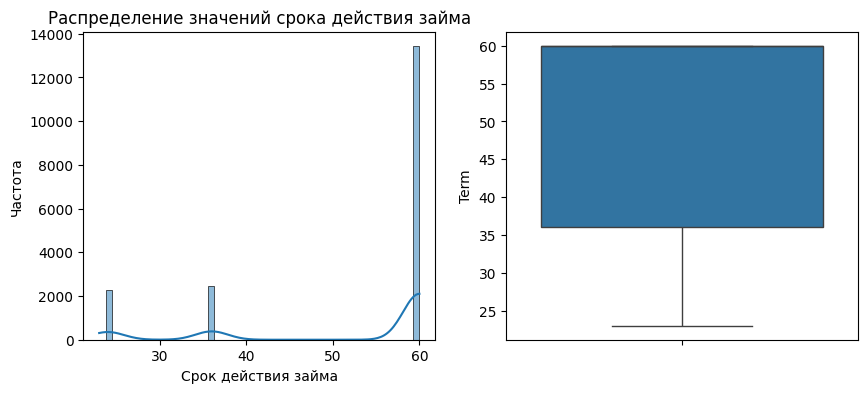

In [360]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Term', kde=True, bins=50)
plt.title('Распределение значений срока действия займа')
plt.xlabel('Срок действия займа')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(data['Term'])

plt.show()

Пожалуй можно сказать, что выбросов нет.

Посмотрим на корреляцию с целевым признаком.

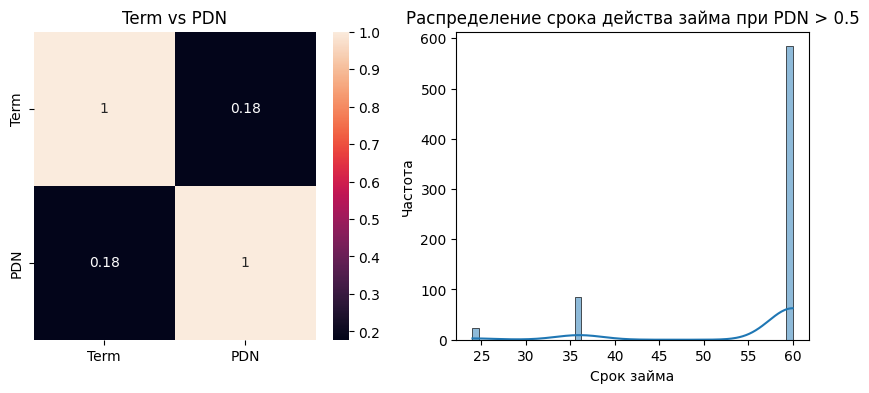

Процент людей с высоким риском невернуть кредит, имеющих срок займа > 40 4.35%
Процент людей с высоким риском невернуть кредит, имеющих срок займа 30 < < 40 3.49%
Процент людей с высоким риском невернуть кредит, имеющих срок займа < 30 1.06%


In [361]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(data[['Term', 'PDN']].corr(), annot=True)
plt.title('Term vs PDN')

plt.subplot(1, 2, 2)
sns.histplot(data=data.query('PDN > 0.5'), x='Term', kde=True, bins=50)
plt.title('Распределение срока действа займа при PDN > 0.5')
plt.xlabel('Срок займа')
plt.ylabel('Частота')

plt.show()

print(f'Процент людей с высоким риском невернуть кредит, имеющих срок займа > 40 {data.query('PDN > 0.5 and Term > 40').shape[0] / data.query('Term > 40').shape[0] * 100:.2f}%')
print(f'Процент людей с высоким риском невернуть кредит, имеющих срок займа 30 < < 40 {data.query('PDN > 0.5 and Term > 30 and Term < 40').shape[0] / data.query('Term > 30 and Term < 40').shape[0] * 100:.2f}%')
print(f'Процент людей с высоким риском невернуть кредит, имеющих срок займа < 30 {data.query('PDN > 0.5 and Term < 30').shape[0] / data.query('Term < 30').shape[0] * 100:.2f}%')

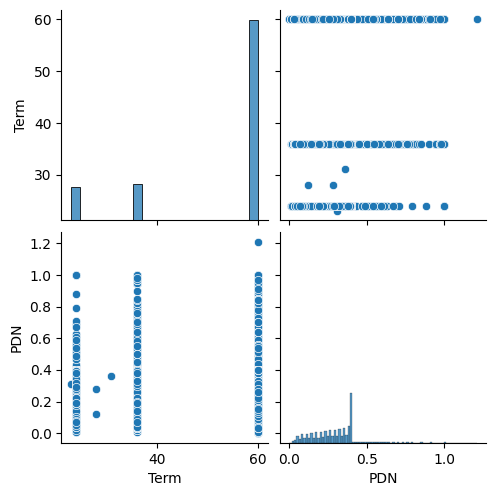

In [362]:
sns.pairplot(data=data[['Term', 'PDN']])
plt.show()

Наверное можно сказать, что некоторая корреляция между сроком займа и вероятностью его невозврата есть. Другими словами, если человек берёт долгосрочный кредит, то шанс его не вернуть деньги выше. Однако опять же таких примеров в датасете очень мало, поэтому трудно сейчас судить насколько это важно.

### **Категориальный признак Credit_history_rating**

In [363]:
data['Credit_history_rating'].value_counts(dropna=False)

,count
Credit_history_rating,
B3,2118
C1,2045
C2,1973
C3,1957
B2,1684
D1,1363
B1,1310
D2,1037
A3,987


В данном признаке есть пропущенные значения.

Перед тем как решить что с ними делать, посмотрим как они коррелируют с целевой переменной.

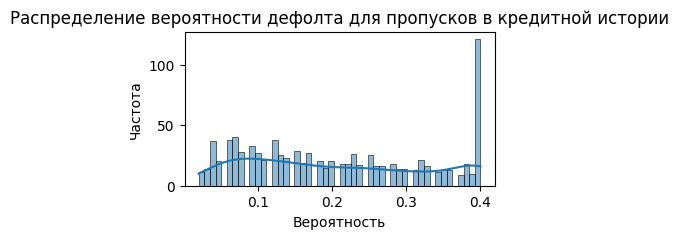

In [364]:
plt.figure(figsize=(4, 2))
sns.histplot(data[data['Credit_history_rating'].isna()], x='PDN', kde=True, bins=50)
plt.title('Распределение вероятности дефолта для пропусков в кредитной истории')
plt.xlabel('Вероятность')
plt.ylabel('Частота')
plt.show()

Данный признак ещё связан с признаком Initial_limit (вероятно банк не станет одобрять большой кредит человеку без кредитной истории). Так что посмотрим как пропуски коррелируют с первоначальны кредитным лимитом.

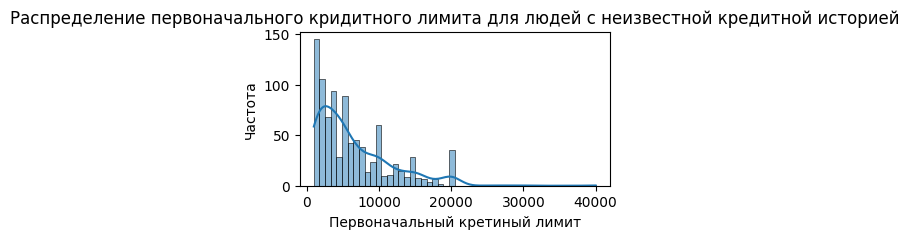

In [365]:
plt.figure(figsize=(4, 2))
sns.histplot(data[data['Credit_history_rating'].isna()], x='Initial_limit', kde=True, bins=50)
plt.title('Распределение первоначального кридитного лимита для людей с неизвестной кредитной историей')
plt.xlabel('Первоначальный кретиный лимит')
plt.ylabel('Частота')
plt.show()

Теперь есть окончательная убеждённость, что пропущенные значения - это просто люди без кредитной истории (банк не часто даёт им большие кредиты + не может сделать сильное предположение о том, вернёт человек кредит или нет (первый график)), поэтому заменим значения NaN на 'no_credit_history'.

In [366]:
data['Credit_history_rating'] = data['Credit_history_rating'].fillna('no_credit_history')

Осталось ещё разобраться с двумя странными значениями -1. Посмотрим на эти объекты.

In [367]:
data[data['Credit_history_rating'] == '-1']

,Debt,Overdue_days,Initial_limit,Sex,EDU,Income,Term,Credit_history_rating,Area,Settlement,Industry,PDN,Scoringmark,Children,Velcom_scoring,Family_status,Age
CLIENTID,,,,,,,,,,,,,,,,,
544748,1021.13,0,2000.0,Мужской,Высшее,1056.07,36,-1,ВИТЕБСКАЯ,НОВОСЕЛКИ,Наука и образование,0.08,NaN,0,NaN,2,25
775360,988.79,0,2000.0,Женский,Среднее,1283.34,36,-1,NaN,МИНСК,Производство,0.07,NaN,0,NaN,2,23


Наиболее вероятнным, как мне кажется, объяснением этого значения является то, что кредитная история есть, но значение пропущено. Это кажется логичным.

Заполнить такие пропуски мне кажется наиболее логичным значением, которое наиболее часто встречается среди людей с такими же Debt, Overdue_days, Initial_limit, Income, Term, Children, Family_status, Age. Так как по логике данный признаки наиболее сильно должны коррелировать между собой.

In [368]:
data.loc[data['Credit_history_rating'] == '-1', 'Credit_history_rating'] =\
data.query("Credit_history_rating != '-1' and Debt > 900 and Debt < 1500 and Overdue_days == 0 and Initial_limit > 1800 and Initial_limit < 2200 and Income > 1000 and Income < 1300 and Term > 30 and Term < 37 and Children == 0 and Family_status == 2 and Age > 20 and Age < 30")['Credit_history_rating']\
.value_counts().index[0]

Теперь можно посмотреть на корреляцию с основным признаком.

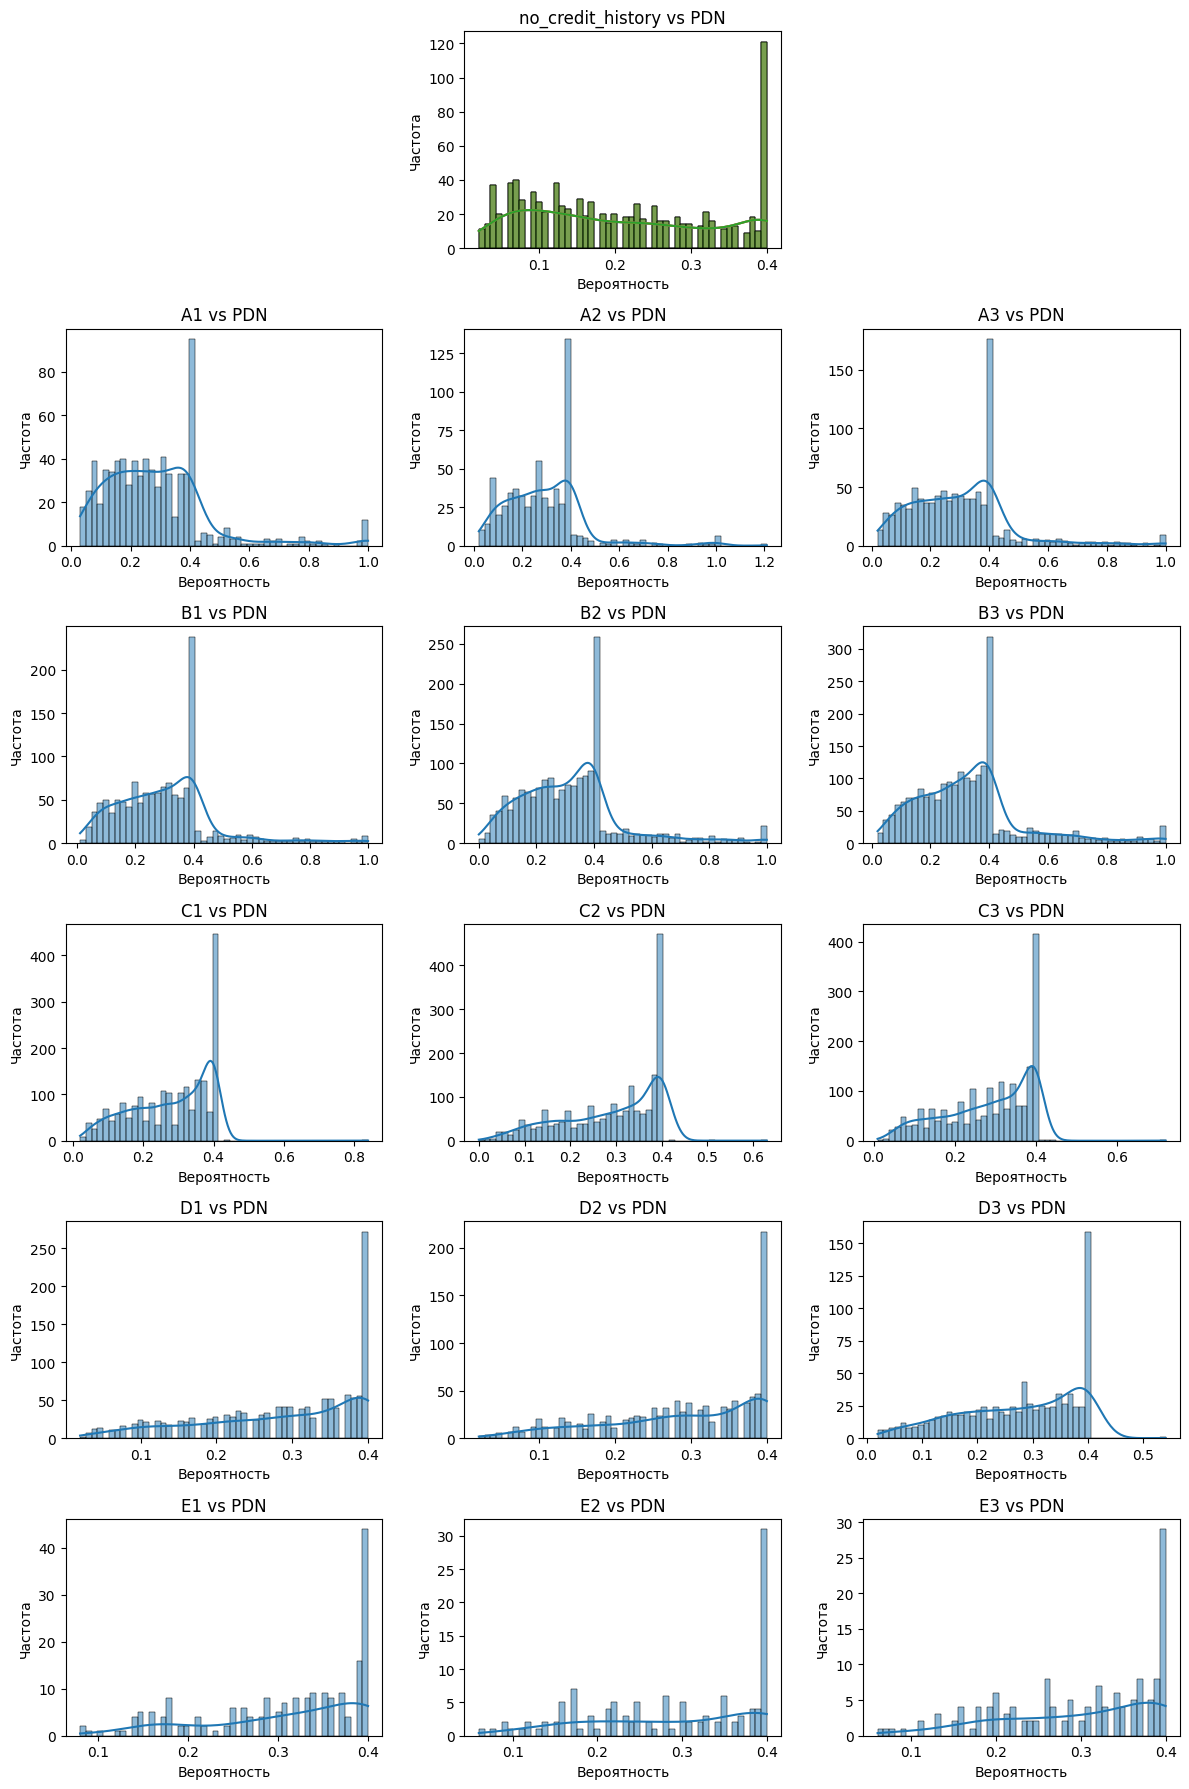

In [369]:
plt.figure(figsize=(12, 18))

for i, alpha in enumerate(['no_credit_history', 'A', 'B', 'C', 'D', 'E']):
    for j, digit in enumerate(['1', '2', '3']):
        if alpha == 'no_credit_history':
            plt.subplot(6, 3, 2)
            sns.histplot(data[data['Credit_history_rating'] == alpha], x='PDN', kde=True, bins=50)
            plt.title(f'{alpha} vs PDN')
        else:
            plt.subplot(6, 3, i * 3 + j + 1)
            sns.histplot(data[data['Credit_history_rating'] == alpha+digit], x='PDN', kde=True, bins=50)
            plt.title(f'{alpha+digit} vs PDN')

        plt.xlabel('Вероятность')
        plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Очень необычные результаты. Судя по ним, вероятность не вернуть кредит есть только у людей с всоким кредитны рейтингом (Рейтинги A и B). Можно подумать, что людям с низким кредитным рейтингом просто не выдаются большие кредиты, поэтому они их с высокой вероятностью возврщают.

Проверим это.

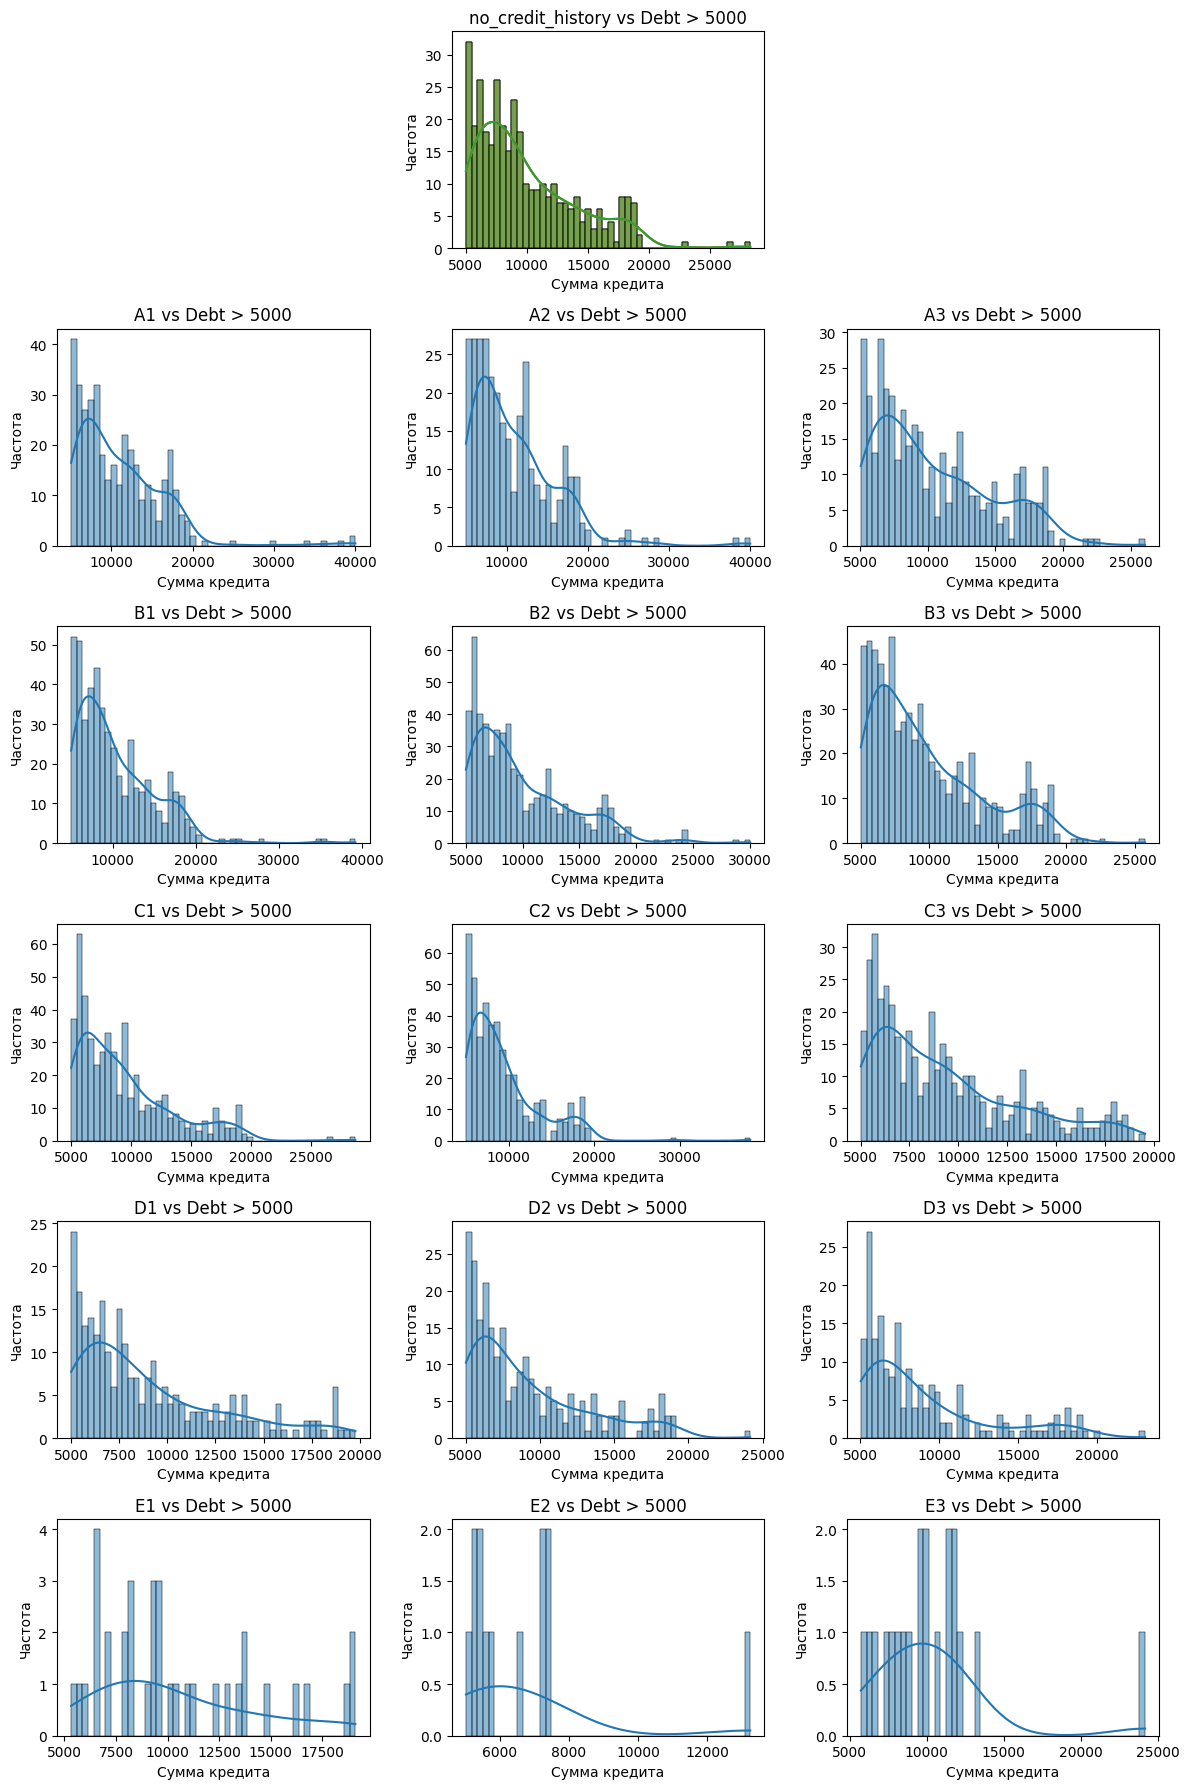

In [370]:
plt.figure(figsize=(12, 18))

for i, alpha in enumerate(['no_credit_history', 'A', 'B', 'C', 'D', 'E']):
    for j, digit in enumerate(['1', '2', '3']):
        if alpha == 'no_credit_history':
            plt.subplot(6, 3, 2)
            sns.histplot(data[(data['Credit_history_rating'] == alpha) & (data['Debt'] > 5000)], x='Debt', kde=True, bins=50)
            plt.title(f'{alpha} vs Debt > 5000')
        else:
            plt.subplot(6, 3, i * 3 + j + 1)
            sns.histplot(data[(data['Credit_history_rating'] == alpha+digit) & (data['Debt'] > 5000)], x='Debt', kde=True, bins=50)
            plt.title(f'{alpha+digit} vs Debt > 5000')

        plt.xlabel('Сумма кредита')
        plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Можно сказать, что в целом это верное утверждение.

Подводя итог по взаимосвязи между целевым признаком и кредитным рейтингом, стоит сказать, что некоторая связь есть и она может быть достаточно важной (просто даже по логике).

### **Категориальные признаки Area и Settlement**

Сначала посмотрим на признак Area, а потом посмотрим на признак Settlement и попробуем понять так ли он важен.

In [371]:
print(data['Area'].unique())

['Гомельская область' nan 'ГРОДНЕНСКАЯ' 'МИНСКАЯ' 'БРЕСТСКАЯ' 'г. Минск'
 'ГОМЕЛЬСКАЯ' 'Минская область' 'Брестская область' 'Гродненская область'
 'Могилевская область' 'Витебская область' 'Г. МИНСК' 'ВИТЕБСКАЯ ОБЛАСТЬ'
 'ВИТЕБСКАЯ' 'Могилевская' 'МОГИЛЕВСКАЯ' 'МИНСКАЯ ОБЛАСТЬ'
 'ГОМЕЛЬСКАЯ ОБЛАСТЬ' 'МОГИЛЁВСКАЯ' 'Минская' 'БРЕСТСКАЯ ОБЛАСТЬ'
 'ГРОДНЕНСКАЯ ОБЛАСТЬ' 'МОГИЛЕВСКАЯ ОБЛАСТЬ' 'Витебская' 'Гомельская'
 'МИНСК' 'Брестская' 'Гродненская' 'ГОМЕЛЬСКАЯ ОБЛ' 'МОГИЛЕВСК']


Видно, что есть много повторяющихся значений, избавимся от них.

In [372]:
data['Area'] = data['Area'].str.lower()
data.loc[data['Area'] == 'гродненская', 'Area'] = 'гродненская область'
data.loc[data['Area'] == 'минская', 'Area'] = 'минская область'
data.loc[data['Area'] == 'брестская', 'Area'] = 'брестская область'
data.loc[data['Area'] == 'г. минск', 'Area'] = 'минск'
data.loc[data['Area'] == 'витебская', 'Area'] = 'витебская область'
data.loc[data['Area'] == 'могилёвская', 'Area'] = 'могилёвская область'
data.loc[data['Area'] == 'могилевская', 'Area'] = 'могилёвская область'
data.loc[data['Area'] == 'могилевская область', 'Area'] = 'могилёвская область'
data.loc[data['Area'] == 'гомельская обл', 'Area'] = 'могилёвская область'
data.loc[data['Area'] == 'гомельская', 'Area'] = 'могилёвская область'
data.loc[data['Area'] == 'могилевск', 'Area'] = 'могилёвск'

In [373]:
print(data['Area'].unique())

['гомельская область' nan 'гродненская область' 'минская область'
 'брестская область' 'минск' 'могилёвская область' 'витебская область'
 'могилёвск']


Теперь посмотрим на признак Settlement

In [374]:
print(data['Settlement'].nunique())

2183


Очевидно, что при таком огромном количестве категорий признак не даст никакой корреляции с целевым признаком, её даже наглядно отследить не удастся, поэтому данный признак стоит удалить и оставить только признак Area.

Однак перед удалением стоит проверить, можно ли заполнить пропущенные значения в Area при помощи Settlement.

In [375]:
f'{data[(data['Area'].isna()) & (data['Settlement'].notna())].shape[0] / data[data['Area'].isna()].shape[0] * 100:.2f}%'

'98.19%'

Отлично, видно, что при помощи этого признака мы сможем покрыть 98 процентов пропусков в признаке Area

In [376]:
print(data[(data['Area'].isna()) & (data['Settlement'].notna())]['Settlement'].unique())

['МИНСК' 'Минск' 'ГОМЕЛЬ' 'ГРОДНО' 'Брест' 'Могилев' 'МОГИЛЕВ' 'ВИТЕБСК'
 'БРЕСТ' 'ДУБРОВНО' 'КРАСНОСЕЛЬСКИЙ' 'Гомель' 'Гродно' 'Орешники'
 'Витебск' 'ПОЛОЦК' 'МАЧУЛИЩИ' 'ЖДАНОВИЧИ' 'НОВОПОЛОЦК' 'КАМЕНЕЦ' 'ЖОДИНО'
 'ЛЯДЫ' 'ПРИЛУКИ' 'ГАТОВО' 'БОБРУЙСК' 'ЖЛОБИН' 'БЫХОВ' 'Орша' 'КВАСОВКА'
 'БЕГОМЛЬ' 'ЕЛЬСК' 'СОЛИГОРСК' 'СВИСЛОЧЬ' 'БОРИСОВ' 'ТЕЛЕХАНЫ' 'БОРОВУХА'
 'ХОРЕВА' 'МОГИЛЁВ' 'ТЫШКОВИЧИ' 'ЗУБКИ' 'РЫМДЮНЫ' 'СЕЛИЩЕ' 'ЛУНИН'
 'ОРЕХОВКА']


Значений достаточно много, поэтому укрупним их.

In [377]:
settlement_to_area = {
    # Минская область
    'МАЧУЛИЩИ': 'минская область', 'ЖДАНОВИЧИ': 'минская область',
    'ЖОДИНО': 'минская область', 'ПРИЛУКИ': 'минская область',
    'ГАТОВО': 'минская область', 'БОРИСОВ': 'минская область',
    'БЕГОМЛЬ': 'минская область', 'СОЛИГОРСК': 'минская область',

    # Брестская область
    'КАМЕНЕЦ': 'брестская область', 'ТЕЛЕХАНЫ': 'брестская область',

    # Витебская область
    'ПОЛОЦК': 'витебская область', 'НОВОПОЛОЦК': 'витебская область',
    'БОРОВУХА': 'витебская область', 'Орша': 'витебская область',
    'БЕГОМЛЬ': 'витебская область', 'ДУБРОВНО': 'витебская область',

    # Гомельская область
    'ЖЛОБИН': 'гомельская область', 'ЕЛЬСК': 'гомельская область',
    'ХОРЕВА': 'гомельская область',

    # Гродненская область
    'КРАСНОСЕЛЬСКИЙ': 'гродненская область', 'СВИСЛОЧЬ': 'гродненская область',

    # Могилевская область
    'БОБРУЙСК': 'могилёвская область', 'БЫХОВ': 'могилёвская область',
    'Орша': 'могилёвская область', 'КВАСОВКА': 'могилёвская область',
    'ТЫШКОВИЧИ': 'могилёвская область', 'ЗУБКИ': 'могилёвская область',
    'РЫМДЮНЫ': 'могилёвская область', 'СЕЛИЩЕ': 'могилёвская область',
    'ЛУНИН': 'могилёвская область', 'ОРЕХОВКА': 'могилёвская область',
    'ЛЯДЫ': 'могилёвская область', 'Орешники': 'могилёвская область'
}

data.loc[data['Settlement'] == 'МИНСК', 'Settlement'] = 'минск'
data.loc[data['Settlement'] == 'Минск', 'Settlement'] = 'минск'
data.loc[data['Settlement'] == 'ГОМЕЛЬ', 'Settlement'] = 'гомельская область'
data.loc[data['Settlement'] == 'Гомель', 'Settlement'] = 'гомельская область'
data.loc[data['Settlement'] == 'ГРОДНО', 'Settlement'] = 'гродненская область'
data.loc[data['Settlement'] == 'Гродно', 'Settlement'] = 'гродненская область'
data.loc[data['Settlement'] == 'Брест', 'Settlement'] = 'брестская область'
data.loc[data['Settlement'] == 'БРЕСТ', 'Settlement'] = 'брестская область'
data.loc[data['Settlement'] == 'Могилев', 'Settlement'] = 'могилёвская область'
data.loc[data['Settlement'] == 'МОГИЛЕВ', 'Settlement'] = 'могилёвская область'
data.loc[data['Settlement'] == 'МОГИЛЁВ', 'Settlement'] = 'могилёвская область'
data.loc[data['Settlement'] == 'ВИТЕБСК', 'Settlement'] = 'витебская область'
data.loc[data['Settlement'] == 'Витебск', 'Settlement'] = 'витебская область'

for settlement, area in settlement_to_area.items():
    data.loc[data['Settlement'] == settlement, 'Settlement'] = area

In [378]:
print(data[(data['Area'].isna()) & (data['Settlement'].notna())]['Settlement'].unique())

['минск' 'гомельская область' 'гродненская область' 'брестская область'
 'могилёвская область' 'витебская область' 'минская область']


Теперь заполним в соответствии с новым признаком пропуски.

In [379]:
data.loc[(data['Area'].isna()) & (data['Settlement'].notna()), 'Area'] =\
 data.loc[(data['Area'].isna()) & (data['Settlement'].notna()), 'Settlement']

data = data.drop(columns='Settlement')

In [380]:
data[data['Area'].isna()].shape[0]

38

Осталось всего 38 пропущенных значение, постараемся понять что с ними делать.

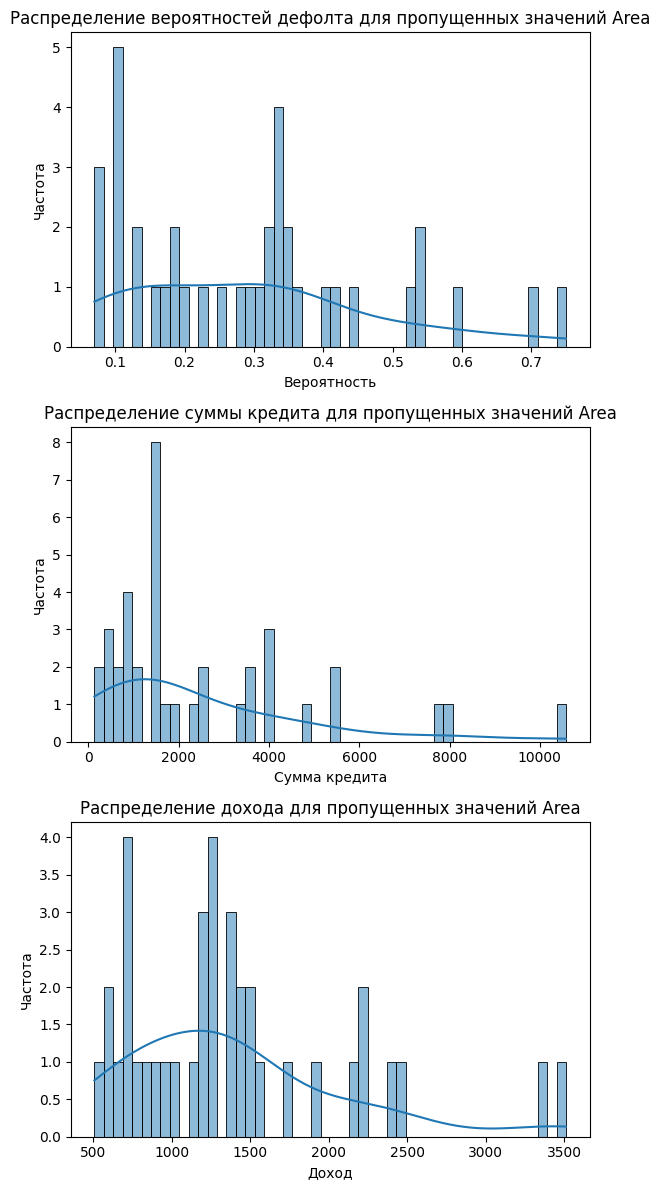

In [381]:
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)
sns.histplot(data=data[data['Area'].isna()], x='PDN', kde=True, bins=50)
plt.title('Распределение вероятностей дефолта для пропущенных значений Area')
plt.xlabel('Вероятность')
plt.ylabel('Частота')

plt.subplot(3, 1, 2)
sns.histplot(data=data[data['Area'].isna()], x='Debt', kde=True, bins=50)
plt.title('Распределение суммы кредита для пропущенных значений Area')
plt.xlabel('Сумма кредита')
plt.ylabel('Частота')

plt.subplot(3, 1, 3)
sns.histplot(data=data[data['Area'].isna()], x='Income', kde=True, bins=50)
plt.title('Распределение дохода для пропущенных значений Area')
plt.xlabel('Доход')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Исходя из графиков можно сказать, что данные объекты не являются какими-либо особенными или принадлежащими к минорному классу, что заставило бы их сохранить. Поэтмому эти 38 объектов с пропущенными значениями будут удалены.

In [382]:
data = data[data['Area'].notna()]

In [383]:
data['Area'].unique()

array(['гомельская область', 'минск', 'гродненская область',
       'минская область', 'брестская область', 'могилёвская область',
       'витебская область', 'могилёвск'], dtype=object)

Теперь, наконец, можем посмотреть на корреляцию с целевым признаком.

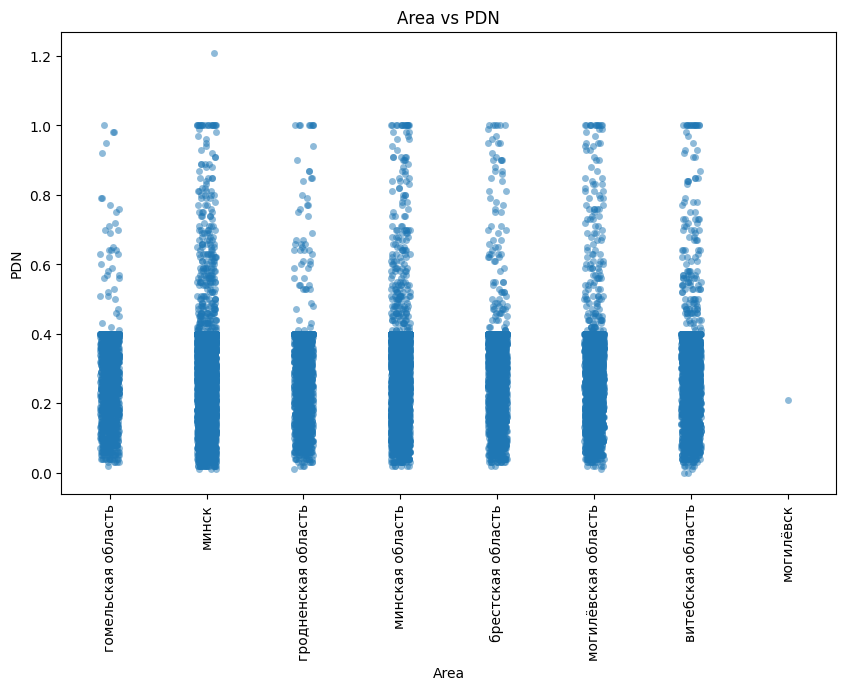

In [384]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='Area', y='PDN', alpha=0.5, jitter=True)
plt.title('Area vs PDN')
plt.xticks(rotation=90)
plt.show()

In [385]:
num_over_05 = data[data['PDN'] > 0.5].shape[0]

for area in data['Area'].unique():
    num_area = data[data['Area'] == area].shape[0]
    num_area_over_05 = data.query(f"Area == '{area}' and PDN > 0.5").shape[0]
    print(f"{area}: процент от общего числа = {num_area_over_05 / num_over_05 * 100:.2f}% | процент от самого себя = {num_area_over_05 / num_area * 100:.2f}%")

гомельская область: процент от общего числа = 4.80% | процент от самого себя = 2.34%
минск: процент от общего числа = 26.64% | процент от самого себя = 3.71%
гродненская область: процент от общего числа = 7.13% | процент от самого себя = 3.42%
минская область: процент от общего числа = 21.40% | процент от самого себя = 4.28%
брестская область: процент от общего числа = 9.46% | процент от самого себя = 3.32%
могилёвская область: процент от общего числа = 15.72% | процент от самого себя = 4.04%
витебская область: процент от общего числа = 14.85% | процент от самого себя = 4.58%
могилёвск: процент от общего числа = 0.00% | процент от самого себя = 0.00%


Опять же объективно трудно оценить взаимосвязи при таком дичайшем дисбалансе. Но всё же некоторая зависимость есть и у жителей гомельской области меньше шанс не вернуть кредит, чем у людей из минской области.

### **Категориальный признак Industry**

In [386]:
data['Industry'].value_counts()

,count
Industry,
Производство,4254
Торговля,3053
АПК,1763
Услуги населению,1143
Наука и образование,1135
Строительство,1134
Транспорт/перевозки,1066
МВД/МЧС/МО,1044
Медицина и здравоохранение,962


Категорий достаточно много, поэтому вместо графиков выведем процентные соотношения.

In [387]:
num_over_05 = data[data['PDN'] > 0.5].shape[0]
percent_industry = pd.DataFrame(columns=['industry', 'percent_by_all', 'percent_by_yourself'])

for industry in data['Industry'].unique():
    num_industry = data[data['Industry'] == industry].shape[0]
    num_industry_over_05 = data.query(f"Industry == '{industry}' and PDN > 0.5").shape[0]
    percent_industry.loc[ len(percent_industry.index) ] =\
     [industry, round(num_industry_over_05 / num_over_05 * 100, 2), round(num_industry_over_05 / num_industry * 100, 2)]

percent_industry

,industry,percent_by_all,percent_by_yourself
0,АПК,6.11,2.38
1,Финансы и страхование,5.09,4.40
2,Медицина и здравоохранение,4.80,3.43
3,Государственное управление,1.60,2.14
4,Производство,21.40,3.46
5,Услуги населению,8.30,4.99
6,Строительство,4.95,3.00
7,Торговля,17.61,3.96
8,Информационные технологии,3.49,4.72
9,Транспорт/перевозки,5.39,3.47


По значениям явно видно, что зависимость есть. Так для занятых иных видах деятельности вероятность невозврата достаточно высока, а для занятых в спорте и туризме практически нулевая.

На мой взгляд корреляция есть и признак важен.

### **Количественный признак Scoringmark**

In [388]:
data['Scoringmark'].describe()

,Scoringmark
count,16513.000000
mean,186.988857
std,67.439946
min,-108.000000
25%,134.000000
50%,183.000000
75%,235.000000
max,416.000000


Вроде, выбросов нет + значения симметричные. Однако есть выбросы, посмотрим как они коррелируют с целевой переменной.

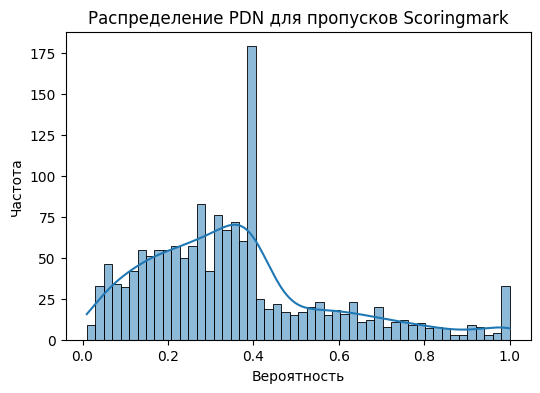

In [389]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data[data['Scoringmark'].isna()], x='PDN', kde=True, bins=50)
plt.title('Распределение PDN для пропусков Scoringmark')
plt.xlabel('Вероятноcть')
plt.ylabel('Частота')
plt.show()

Никаких особых зависимостей нет. Однако этих значений очень много и жалко их удалять. Попробуем посмотреть есть ли корреляция этого признака с PDN.

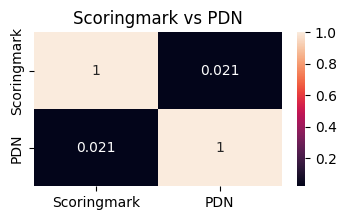

In [390]:
plt.figure(figsize=(4, 2))
sns.heatmap(data=data[['Scoringmark', 'PDN']].corr(), annot=True)
plt.title('Scoringmark vs PDN')
plt.show()

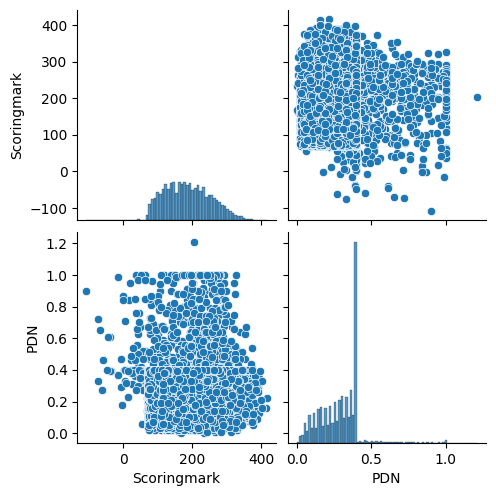

In [391]:
sns.pairplot(data[data['Scoringmark'].notna()][['Scoringmark', 'PDN']])
plt.show()

Явно чем больше оценка, тем меньше риск невозврата кредита, однако это не всегда так, нужно посмотреть ещё корреляцию с другим признаком - Credit_history_rating

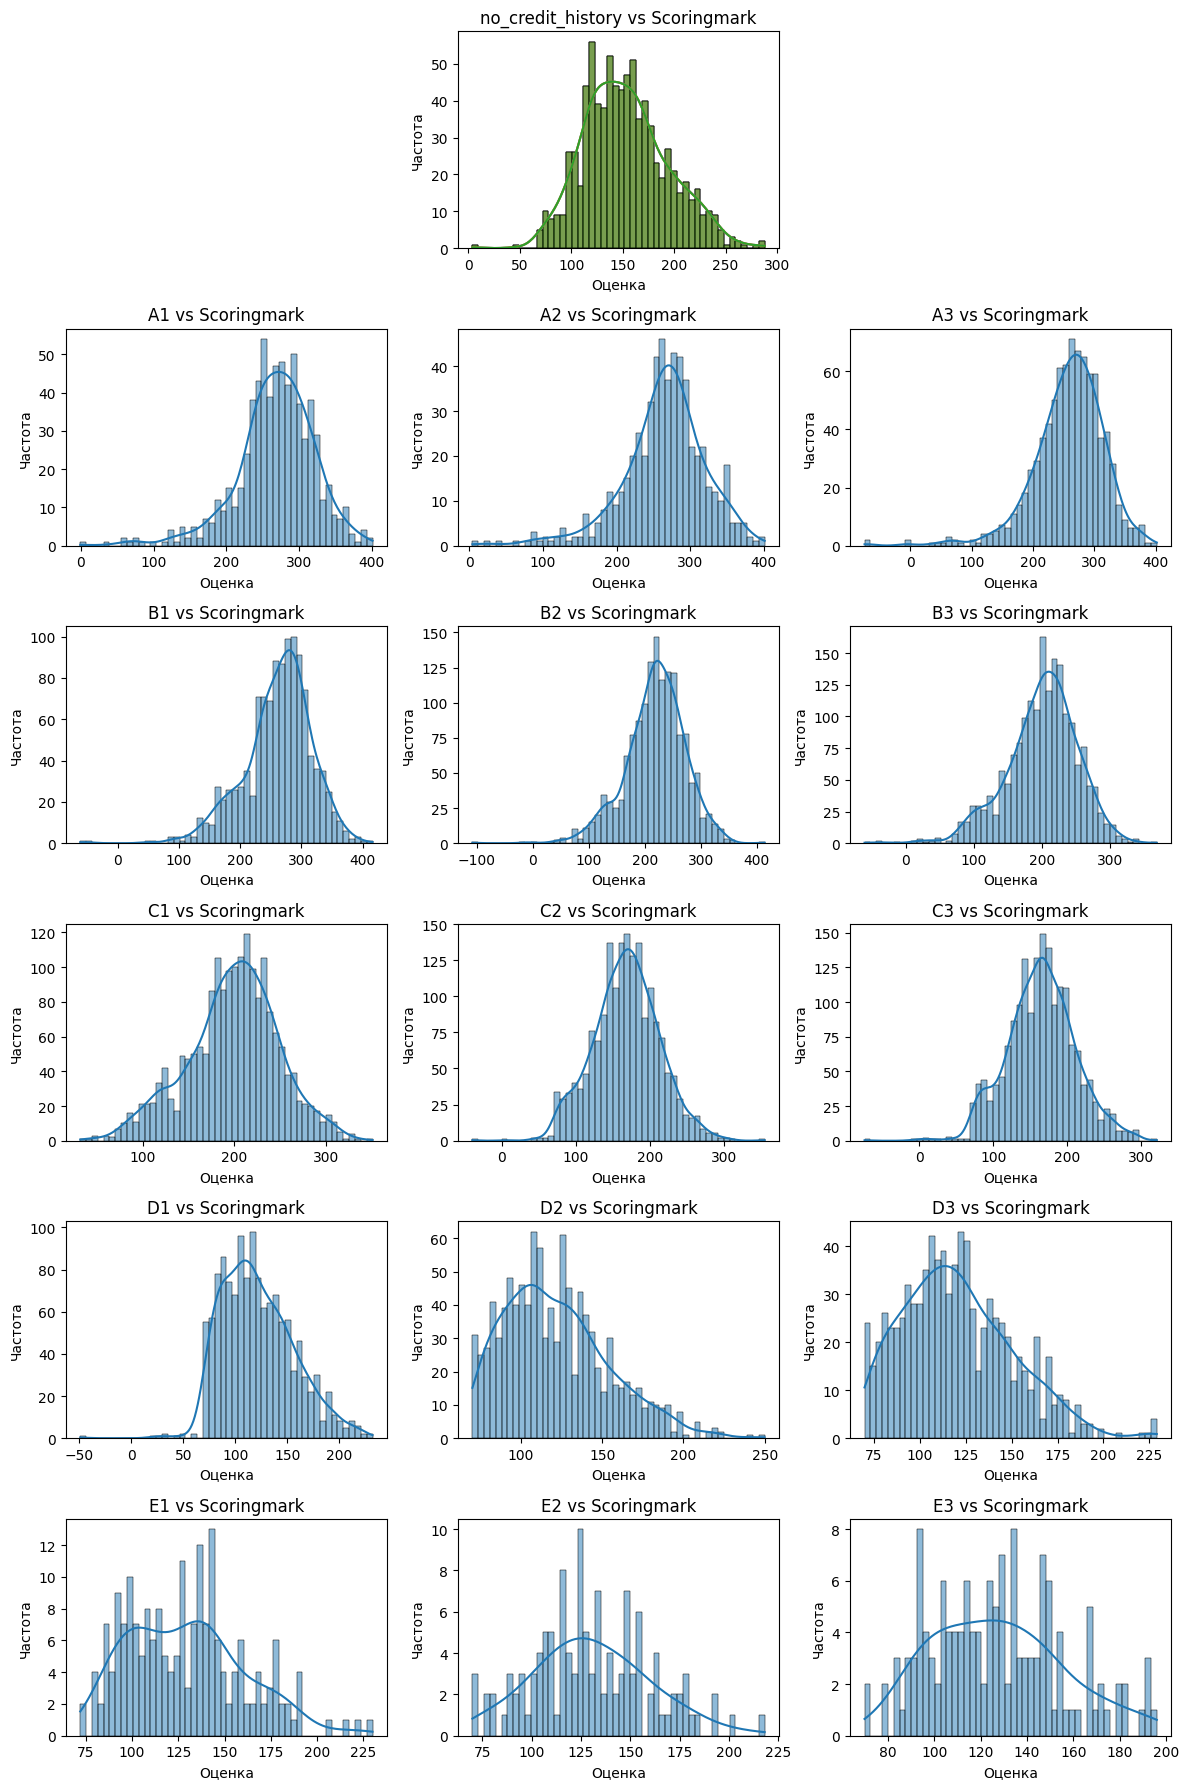

In [392]:
plt.figure(figsize=(12, 18))

for i, alpha in enumerate(['no_credit_history', 'A', 'B', 'C', 'D', 'E']):
    for j, digit in enumerate(['1', '2', '3']):
        if alpha == 'no_credit_history':
            plt.subplot(6, 3, 2)
            sns.histplot(data[(data['Credit_history_rating'] == alpha) & (data['Scoringmark'].notna())], x='Scoringmark', kde=True, bins=50)
            plt.title(f'{alpha} vs Scoringmark')
        else:
            plt.subplot(6, 3, i * 3 + j + 1)
            sns.histplot(data[(data['Credit_history_rating'] == alpha+digit) & (data['Scoringmark'].notna())], x='Scoringmark', kde=True, bins=50)
            plt.title(f'{alpha+digit} vs Scoringmark')

        plt.xlabel('Оценка')
        plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Опять же нет никакой корреляции. Посмотрим ещё на корреляцию с доходом и начальным кредитным лимитом.

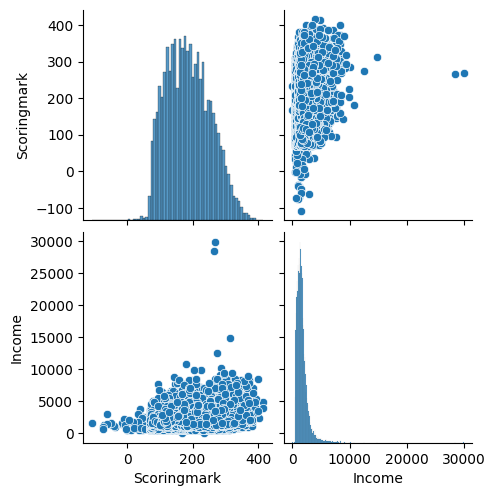

In [393]:
sns.pairplot(data[data['Scoringmark'].notna()][['Scoringmark', 'Income']])
plt.show()

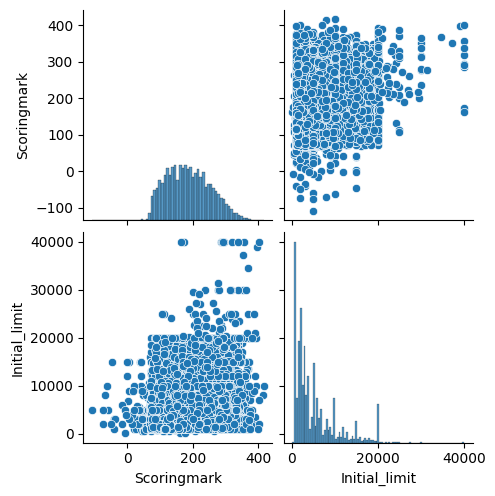

In [394]:
sns.pairplot(data[data['Scoringmark'].notna()][['Scoringmark', 'Initial_limit']])
plt.show()

Тут уже есть корреляции.

Тогда будем заполнять пропуски средним среди соседей по этим двум признакам.

In [395]:
# Округленные версии признаков для группировки
data['Initial_limit_rounded'] = np.round(data['Initial_limit'] / 500) * 500  # Округление до 500
data['Income_rounded'] = np.round(data['Income'] / 500) * 500  # Округление до 500

data['Scoringmark'] = data.groupby(
    ['Initial_limit_rounded', 'Income_rounded'], dropna=False
)['Scoringmark'].transform(
    lambda x: x.fillna(x.mean(skipna=True))
)

data = data.drop(columns=['Initial_limit_rounded', 'Income_rounded'])

In [396]:
data = data.reset_index(drop=False)
data.index = range(len(data))

In [397]:
data[data['Scoringmark'].isna()].shape[0]

20

Оставшиеся незаполненные значения удалим.

In [398]:
data['Scoringmark'] = data.loc[data['Scoringmark'].notna(), 'Scoringmark']

Теперь посмотрим на корреляцию с целевой переменной ещё раз.

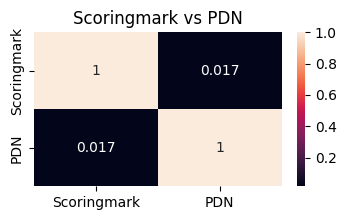

In [399]:
plt.figure(figsize=(4, 2))
sns.heatmap(data[['Scoringmark', 'PDN']].corr(), annot=True)
plt.title('Scoringmark vs PDN')
plt.show()

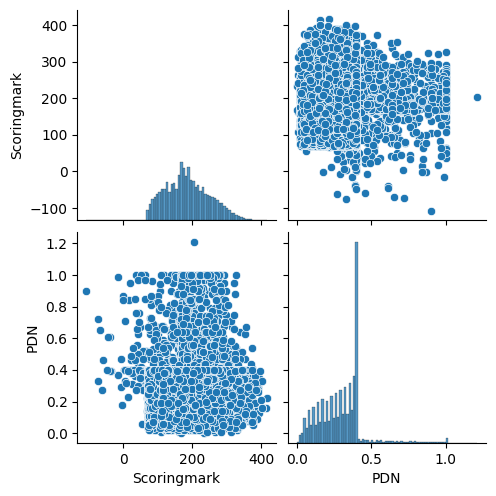

In [400]:
sns.pairplot(data=data[['Scoringmark', 'PDN']])
plt.show()

Явной взаимосвязи не прослеживается, однако некоторые закономерности есть (чем выше оценка, тем меньше риск), поэтому мне кажется что данный признак имеет значение и удалять его не стоит.

### **Количественный признак Children**

In [401]:
data['Children'].describe()

,Children
count,18076.000000
mean,0.636092
std,0.852763
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


Выбросов нет, однако есть несколько пропусков.

Очевидно данный признак должен коррелировать с возрастом и семейным статусом, поэтому заполним пропуски опираясь на похожие по возрасту и семейному статусу объекты.

In [402]:
data['Age_rounded'] = np.round(data['Age'] / 5) * 5  # Округление до 5

data['Children'] = data.groupby(
    ['Age_rounded', 'Family_status'], dropna=False
)['Children'].transform(
    lambda x: x.fillna(round(x.mean(skipna=True), 0))
)

data = data.drop(columns='Age_rounded')

Теперь посмотрим на корреляцию с основным признаком.

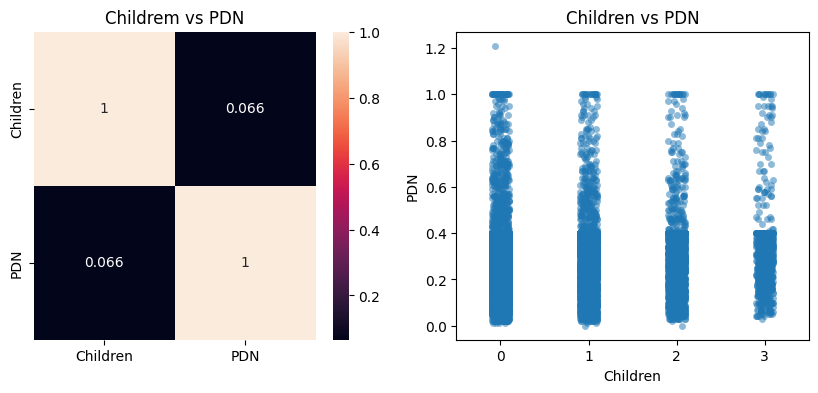

In [403]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(data[['Children', 'PDN']].corr(), annot=True)
plt.title('Childrem vs PDN')

plt.subplot(1, 2, 2)
sns.stripplot(data=data, x='Children', y='PDN', alpha=0.5)
plt.title('Children vs PDN')

plt.show()

In [404]:
num_over_05 = data[data['PDN'] > 0.5].shape[0]
percent_by_children = pd.DataFrame(columns=['num_children', 'percent_by_all', 'percent_by_yourself'])

for num_children in data['Children'].unique():
    current = data[data['Children'] == num_children].shape[0]
    current_over_05 = data.query(f'PDN > 0.5 and Children == {num_children}').shape[0]
    percent_by_children.loc[ len(percent_by_children.index) ] =\
     [num_children, round(current_over_05 / num_over_05 * 100, 2), round(current_over_05 / current * 100, 2)]

percent_by_children

,num_children,percent_by_all,percent_by_yourself
0,0.0,45.27,3.00
1,1.0,28.09,4.16
2,3.0,9.61,9.42
3,2.0,17.03,4.92


Видно, что есть зависимость между количетвом детей и риском не вернуть кредит, хотя, опятьже дисбаланс её размывает.

Вообще логично считать, что этот признак очень важен в решаемой задаче, удалять его точно не стоит.

### **Количественный признак Velcom_scoring**

In [405]:
data['Velcom_scoring'].isna().sum()

np.int64(9204)

В данном признаке очень много пропусков, однако перед тем, как его удалить стоит посмотреть на корреляцию пропусков с целевым признаком.

In [406]:
f"Процент пропущенных значений Velcom_scoring среди людей с высоким риском не вернуть кредит = {data.query('PDN > 0.5 and Velcom_scoring.isna()').shape[0] / num_over_05 * 100:.2f}%"

'Процент пропущенных значений Velcom_scoring среди людей с высоким риском не вернуть кредит = 99.71%'

Раз такая корреляция есть (явно есть зависимость), то заменим пустые значения на -1

In [407]:
data['Velcom_scoring'] = data['Velcom_scoring'].fillna(-1)

И посмотрим на итоговую корреляцию

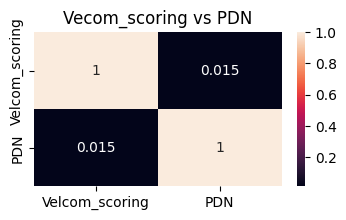

In [408]:
plt.figure(figsize=(4, 2))
sns.heatmap(data[['Velcom_scoring', 'PDN']].corr(), annot=True)
plt.title('Vecom_scoring vs PDN')
plt.show()

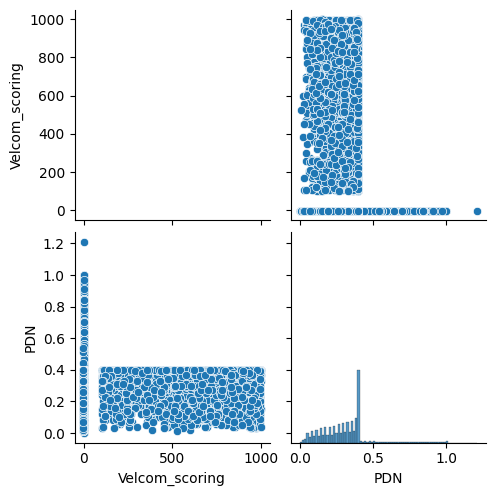

In [409]:
sns.pairplot(data[['Velcom_scoring', 'PDN']])
plt.show()

Конечно, прям прямой зависимости нет, но явно закономерности есть и можно по значениям определить будет ли высок риск невозврата или нет (для тех у кого есть оценка риск не велик).

Стоит оставить этот признак.

### **Категориальный признак Family_status**

In [410]:
data['Family_status'].value_counts()

,count
Family_status,
1,9093
2,8976
3,6
4,1


In [411]:
data['Family_status'].isna().sum()

np.int64(0)

Пропусков нет, поэтому перейдём сразу к корреляциям.

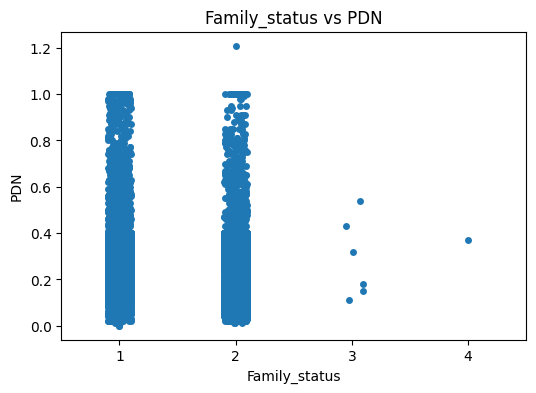

In [412]:
plt.figure(figsize=(6, 4))
sns.stripplot(data=data, x='Family_status', y='PDN')
plt.title('Family_status vs PDN')
plt.show()

In [413]:
num_over_05 = data[data['PDN'] > 0.5].shape[0]
percent_by_family = pd.DataFrame(columns=['family_status', 'percent_by_all', 'percent_by_yourself'])

for family_status in data['Family_status'].unique():
    current = data[data['Family_status'] == family_status].shape[0]
    current_over_05 = data.query(f'PDN > 0.5 and Family_status == {family_status}').shape[0]
    percent_by_family.loc[ len(percent_by_family.index) ] =\
     [num_children, round(current_over_05 / num_over_05 * 100, 2), round(current_over_05 / current * 100, 2)]

percent_by_family

,family_status,percent_by_all,percent_by_yourself
0,2.0,65.07,4.92
1,2.0,34.79,2.66
2,2.0,0.15,16.67
3,2.0,0.00,0.00


Тут есть зависимость, люди с 1 ребёнком и без детей чаще не возвращают кредиты. Однако опять же не понятно как изменятся положения, если мы сбалансируем классы. Однако данный признак явно важен и его стоит оставить.

## **Итоги по первичному анализу**

По итогу первичного анализа можно сказать следующее:
- Наиболее значимыми признаками являются:
    - Debt;
    - Initial_limit;
    - Credit_history_rating;
    - Industry;
    - Scoringmark;
    - Children;
    - Velcom_scoring;
    - Family_status.
- Наименее значимым признаками (кандидатами на удаления) являются:
    - Overdue_days;
    - Age.

Также стоит заметить, что главной проблемой датасета является оченб большой дисбаланс, так людей с риском не вернуть долг выше 0.5 только 5% от выборки. Это затрудняет как оценку зависимостей, так и будет затруднять дальнейшее обучение.

Ещё стоит заметь, что для решения этой задачи явно не подойдут линейные алгоритмы, так как например для признака Velcom_scoring нет линейной зависимости, но есть что-то похожее на классы (при значении -1 риск может быть любым, а при значении > 0 риск не велик (< 0.5)), вряд ли такое можно аппроксимировать линейной регрессией, стоит присмотреться к решающим деревьям

# **Обработка категориальных признаков**

Чтобы не наплодить излишнего количества столбцов, столцы, имеющие больше 3 категорий, будут обрабатываться при помощи Label-encoding, а имеющие 3 и меньше категории при помощи OHE.

**Sex**

In [414]:
OHE_sex = pd.get_dummies(data['Sex'], drop_first=True)

data = pd.concat([data, OHE_sex], axis=1)

data.drop(columns='Sex', inplace=True)

In [415]:
data.columns

Index(['CLIENTID', 'Debt', 'Overdue_days', 'Initial_limit', 'EDU', 'Income',
       'Term', 'Credit_history_rating', 'Area', 'Industry', 'PDN',
       'Scoringmark', 'Children', 'Velcom_scoring', 'Family_status', 'Age',
       'Мужской'],
      dtype='object')

**EDU**

In [416]:
le_edu = LabelEncoder()

data['EDU'] = le_edu.fit_transform(data['EDU'])

**Credit_history_rating**

In [417]:
le_chr = LabelEncoder()

data['Credit_history_rating'] = le_chr.fit_transform(data['Credit_history_rating'])

**Area**

In [418]:
le_area = LabelEncoder()

data['Area'] = le_area.fit_transform(data['Area'])

**Industry**

In [419]:
le_industry = LabelEncoder()

data['Industry'] = le_industry.fit_transform(data['Industry'])

**Family_status**

Данный признак уже преобразован, оставим его без изменений.

# **Оценка корреляции между нецелевыми признаками**

Теперь посмотрим есть ли сильные зависимости между признаками, на основе которых некоторые признаки стоит удалить.

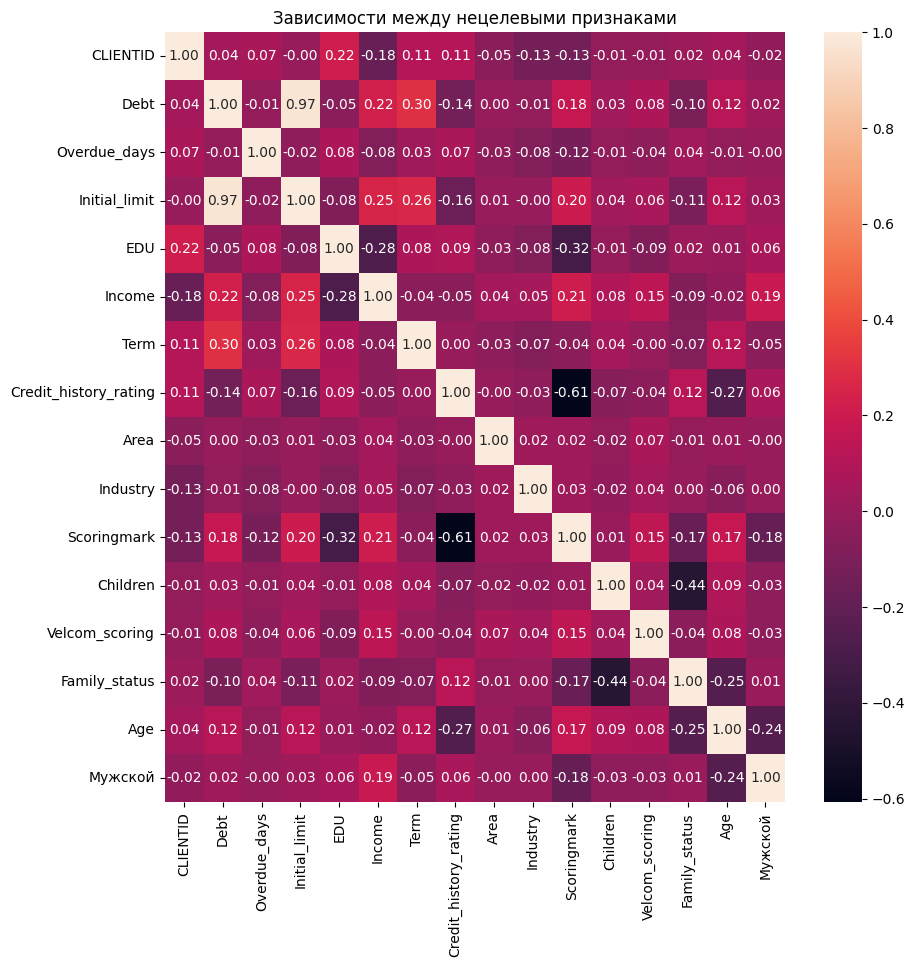

In [420]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(columns='PDN').corr(), annot=True, fmt='.2f')
plt.title('Зависимости между нецелевыми признаками')
plt.show()

Между Credit_history_rating и Scoringmark уж очень большая корреляция, стоит удалить один из признаков - Scorignmark.

Также очень большая корреляция между Initial_limit и Debt, стоит удалить Debt.

In [421]:
data = data.drop(columns=['Scoringmark', 'Debt'])

# Повторная оценка корреляции нецелевых признаков с целевым

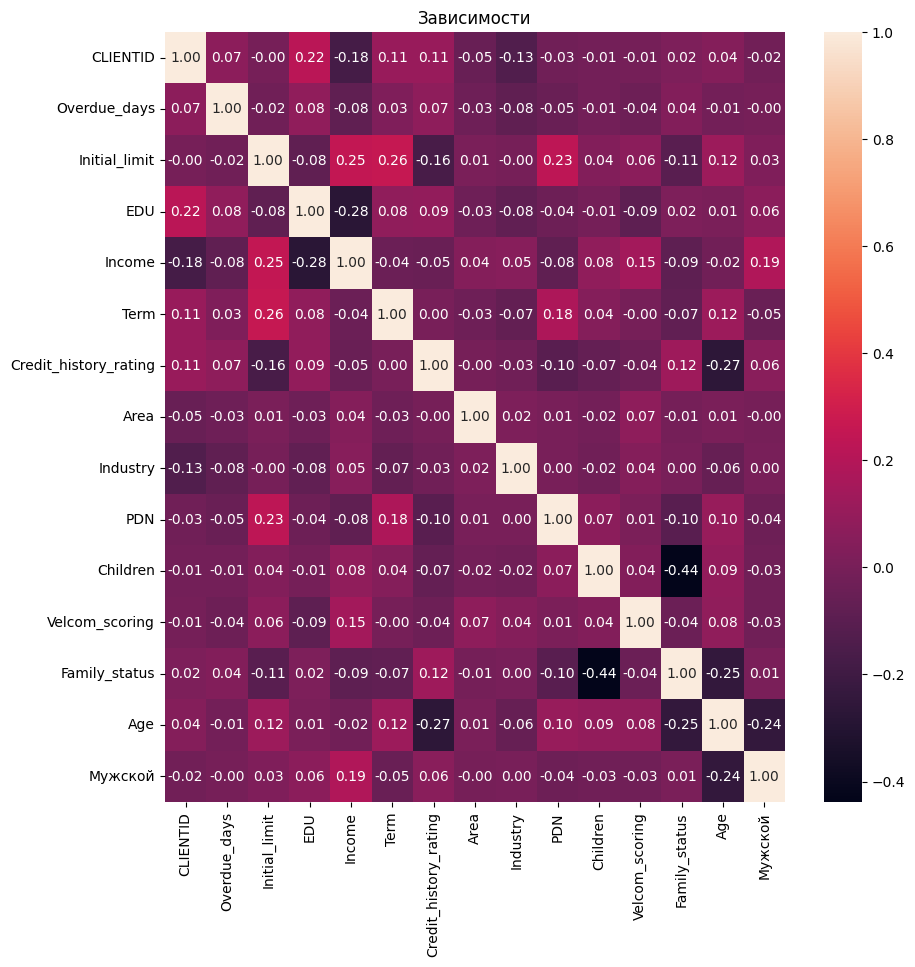

In [422]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Зависимости')
plt.show()

Видно, что практически нет корреляции с целевым признаком у нецелевых признаков. Это может говорить о следующем:
- Между признаками нет линейной зависимости (корреляция Пирсона не смогла её оценить);
- Дисбаланс классов: дисбаланс классов может плохо сказываться на корреляции;
- Самый плохой случай: данные плохие и задача не решается - нет никаких зависимостей между целевым и нецелевыми признаками.